In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import graphviz
from sklearn.decomposition import PCA

In [2]:
path_features = 'C:\\Belgium test Project\\Features\\features.csv'
path_features_MAT = 'C:\\Belgium test Project\\Features from MATLAB\\post_pro_input.csv'
path_spy_label = 'C:\\Belgium test Project\\Label\\Label.csv'

In [3]:
features = pd.read_csv(path_features)
py_label = pd.read_csv(path_spy_label)
input_py = features.merge(py_label,left_index = True,right_index=True)

input_MAT = pd.read_csv(path_features_MAT)
Lab_MAT = input_MAT['Label'].to_numpy()
Class = []
for l in range(len(Lab_MAT)):
    if Lab_MAT[l] == 1:
        Class.append('Mitosis')
    if Lab_MAT[l] == 0:
        Class.append('Normal')
pd_class = pd.DataFrame({'Class':Class})

mod_input_MAT = input_MAT.merge(pd_class,left_index = True,right_index=True)

# Python features

In [4]:
input_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Closed Euclidean distance from neighbor  283 non-null    float64
 1   Area of mother cell                      283 non-null    int64  
 2   Major axis of mother cell                283 non-null    float64
 3   Minor axis of mother cell                283 non-null    float64
 4   Circularity of mother cell               283 non-null    float64
 5   Mean intensity of mother cell            283 non-null    float64
 6   Max intensity of mother cell             283 non-null    float64
 7   Min intensity of mother cell             283 non-null    float64
 8   Area of daughter cell                    283 non-null    int64  
 9   Major axis of daughter cell              283 non-null    float64
 10  Minor axis of daughter cell              283 non-n

In [5]:
input_py.describe()

Closed Euclidean distance from neighbor  Area of mother cell  \
count                               283.000000           283.000000   
mean                                213.717716           150.300353   
std                                 278.529014           131.118017   
min                                   9.193927            14.000000   
25%                                  17.749466            71.500000   
50%                                  28.060644           126.000000   
75%                                 393.891857           186.500000   
max                                1667.854949          1054.000000   

       Major axis of mother cell  Minor axis of mother cell  \
count                 283.000000                 283.000000   
mean                   17.404193                  10.852483   
std                     7.395573                   4.640025   
min                     5.018775                   3.160370   
25%                    12.834134                   7.716552   
50%                    15.468234                  10.941739   
75%                    20.857651                  13.227969   
max                    46.296900                  37.351940   

       Circularity of mother cell  Mean intensity of mother cell  \
count                  283.000000                     283.000000   
mean                     0.711826                       0.477058   
std                      0.182565                       0.108957   
min                      0.222317                       0.270371   
25%                      0.591142                       0.389070   
50%                      0.726433                       0.460022   
75%                      0.875961                       0.563528   
max                      0.976971                       0.681766   

       Max intensity of mother cell  Min intensity of mother cell  \
count                    283.000000                    283.000000   
mean                       0.767578                      0.168063   
std                        0.124889                      0.190508   
min                        0.652844                      0.002486   
25%                        0.695892                      0.029197   
50%                        0.699350                      0.063145   
75%                        0.788890                      0.261988   
max                        1.178946                      0.636622   

       Area of daughter cell  Major axis of daughter cell  ...  \
count             283.000000                   283.000000  ...   
mean              121.243816                    15.465369  ...   
std               103.307984                     6.783429  ...   
min                21.000000                     5.847751  ...   
25%                52.000000                    10.691967  ...   
50%                99.000000                    14.300863  ...   
75%               153.000000                    17.737334  ...   
max               760.000000                    46.033338  ...   

       Maximum of Euclidean distance  Variance of Euclidean distance  \
count                     283.000000                      283.000000   
mean                       12.867799                       29.073346   
std                         9.005507                       44.228775   
min                         0.301240                        0.000063   
25%                         6.286555                        3.060476   
50%                        10.512297                       10.046994   
75%                        18.119683                       40.220297   
max                        48.329246                      331.918305   

       Mean of Euclidean distance  Range of Euclidean distance  \
count                  283.000000                   283.000000   
mean                     5.312947                    11.358961   
std                      3.905457                     8.704596   
min                      0.221686                     0.

In [6]:
mod_input_MAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Closed Euclidean distance from neighbor  244 non-null    float64
 1   Area of mother cell                      244 non-null    int64  
 2   Major axis of mother cell                244 non-null    float64
 3   Minor axis of mother cell                244 non-null    float64
 4   Circularity of mother cell               244 non-null    float64
 5   Mean intensity of mother cell            244 non-null    float64
 6   Area of daughter cell                    244 non-null    int64  
 7   Major axis of daughter cell              244 non-null    float64
 8   Minor axis of daughter cell              244 non-null    float64
 9   Circularity of daughter cell             244 non-null    float64
 10  Mean intensity of daughter cell          244 non-n

In [7]:
mod_input_MAT.describe()

Closed Euclidean distance from neighbor  Area of mother cell  \
count                               244.000000           244.000000   
mean                                 52.993442           122.987705   
std                                 141.911181            98.182264   
min                                   1.490712             1.000000   
25%                                   7.714816            34.000000   
50%                                  12.296200           105.500000   
75%                                  19.545510           179.000000   
max                                1292.409000           433.000000   

       Major axis of mother cell  Minor axis of mother cell  \
count                 244.000000                 244.000000   
mean                   15.362688                  15.362688   
std                     7.432906                   7.432906   
min                     1.154701                   1.154701   
25%                    10.617505                  10.617505   
50%                    15.070645                  15.070645   
75%                    20.207025                  20.207025   
max                    37.989510                  37.989510   

       Circularity of mother cell  Mean intensity of mother cell  \
count                  244.000000                     244.000000   
mean                     1.047217                       0.554554   
std                      1.088351                       0.189400   
min                      0.109163                       0.275288   
25%                      0.605395                       0.397656   
50%                      0.932730                       0.540363   
75%                      1.070608                       0.663678   
max                      6.542259                       1.141194   

       Area of daughter cell  Major axis of daughter cell  \
count             244.000000                   244.000000   
mean               78.245902                    11.792134   
std                66.821710                     6.357791   
min                 1.000000                     1.154701   
25%                24.750000                     8.288569   
50%                63.000000                    12.224650   
75%               129.000000                    15.240520   
max               405.000000                    37.702100   

       Minor axis of daughter cell  Circularity of daughter cell  ...  \
count                   244.000000                    244.000000  ...   
mean                     11.792134                      1.146387  ...   
std                       6.357791                      1.055180  ...   
min                       1.154701                      0.179839  ...   
25%                       8.288569                      0.708894  ...   
50%                      12.224650                      1.030375  ...   
75%                      15.240520                      1.141064  ...   
max                      37.702100                      6.542259  ...   

       Minimum of Euclidean distance  Mean of Euclidean distance  \
count                     244.000000                  244.000000   
mean                        1.387596                    0.123460   
std                         1.328589                    0.078562   
min                         0.012502                    0.003087   
25%                         0.527684                    0.065525   
50%                         1.020876                    0.110129   
75%                         1.803257                    0.165465   
max                         8.854121                    0.392855   

       Variance of Euclidean distance  Range of Euclidean distance  \
count                      244.000000                   244.000000   
mean                         1.301999                     9.838794   
std                          1.830512                     8.666564   
min                          0.001179                     0.191411   
25%            

Text(0.5, 1.0, 'The path process by MATLAB programming')

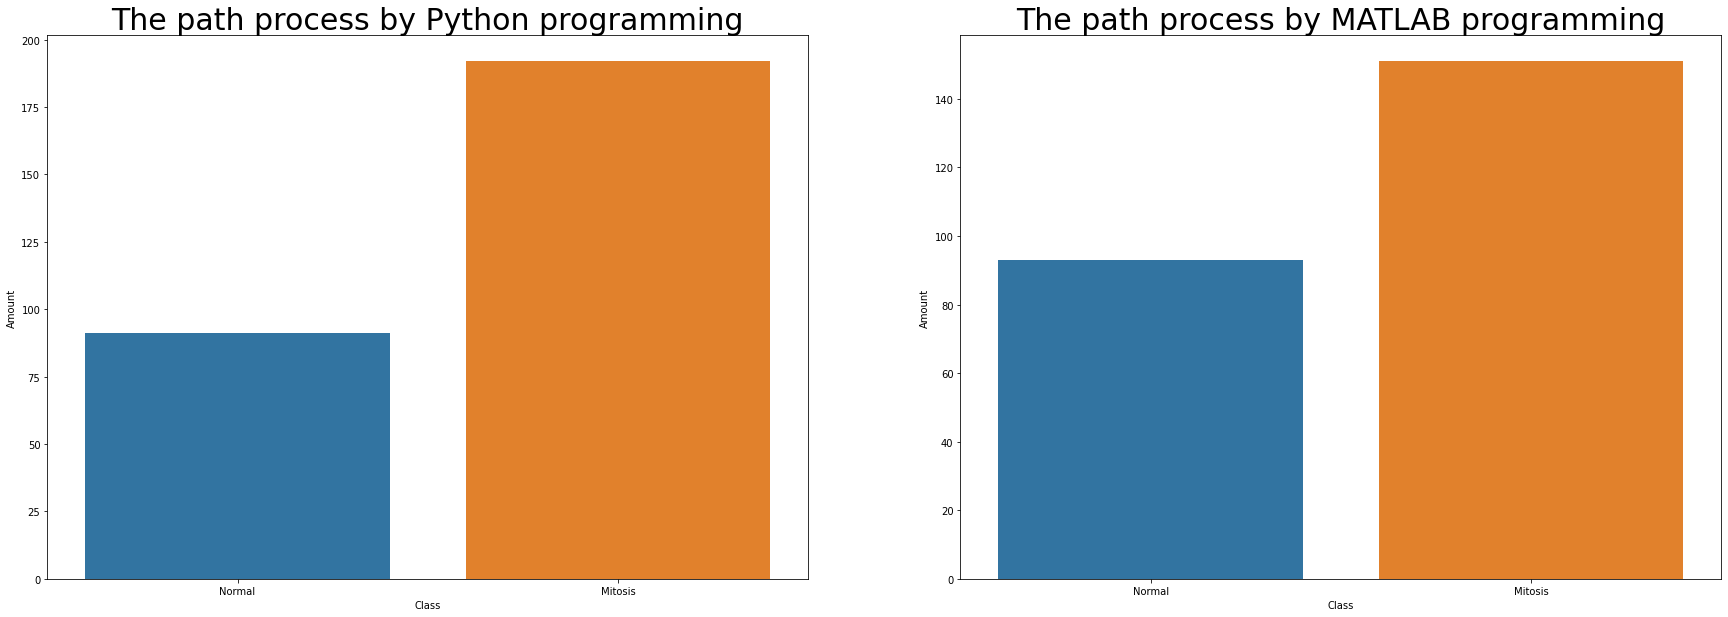

In [8]:
# PY class wise amount
Lab_PY = input_py['Label'].to_numpy()
Lab_py_norm = len(Lab_PY[Lab_PY == 0])
Lab_py_mito = len(Lab_PY[Lab_PY == 1])

PY_amount = pd.DataFrame({'Amount':[Lab_py_norm,Lab_py_mito],'Class' : ['Normal','Mitosis']})
# MAT class wise amount
Lab_MAT_norm = len(Lab_MAT[Lab_MAT == 0])
Lab_MAT_mito = len(Lab_MAT[Lab_MAT == 1])
MAT_amount = pd.DataFrame({'Amount':[Lab_MAT_norm,Lab_MAT_mito],'Class' : ['Normal','Mitosis']})

plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'Class', y = 'Amount', data = PY_amount)
plt.title('The path process by Python programming',fontsize = 30)
plt.subplot(1,2,2)
ax = sns.barplot(x = 'Class', y = 'Amount', data = MAT_amount)
plt.title('The path process by MATLAB programming',fontsize = 30)

In [9]:
print('The amount of detected mitotic path from Python is ' + str(Lab_py_mito))

The amount of detected mitotic path from Python is 192


In [10]:
print('The amount of detected mitotic path from MATLAB is ' + str(Lab_MAT_mito))

The amount of detected mitotic path from MATLAB is 151


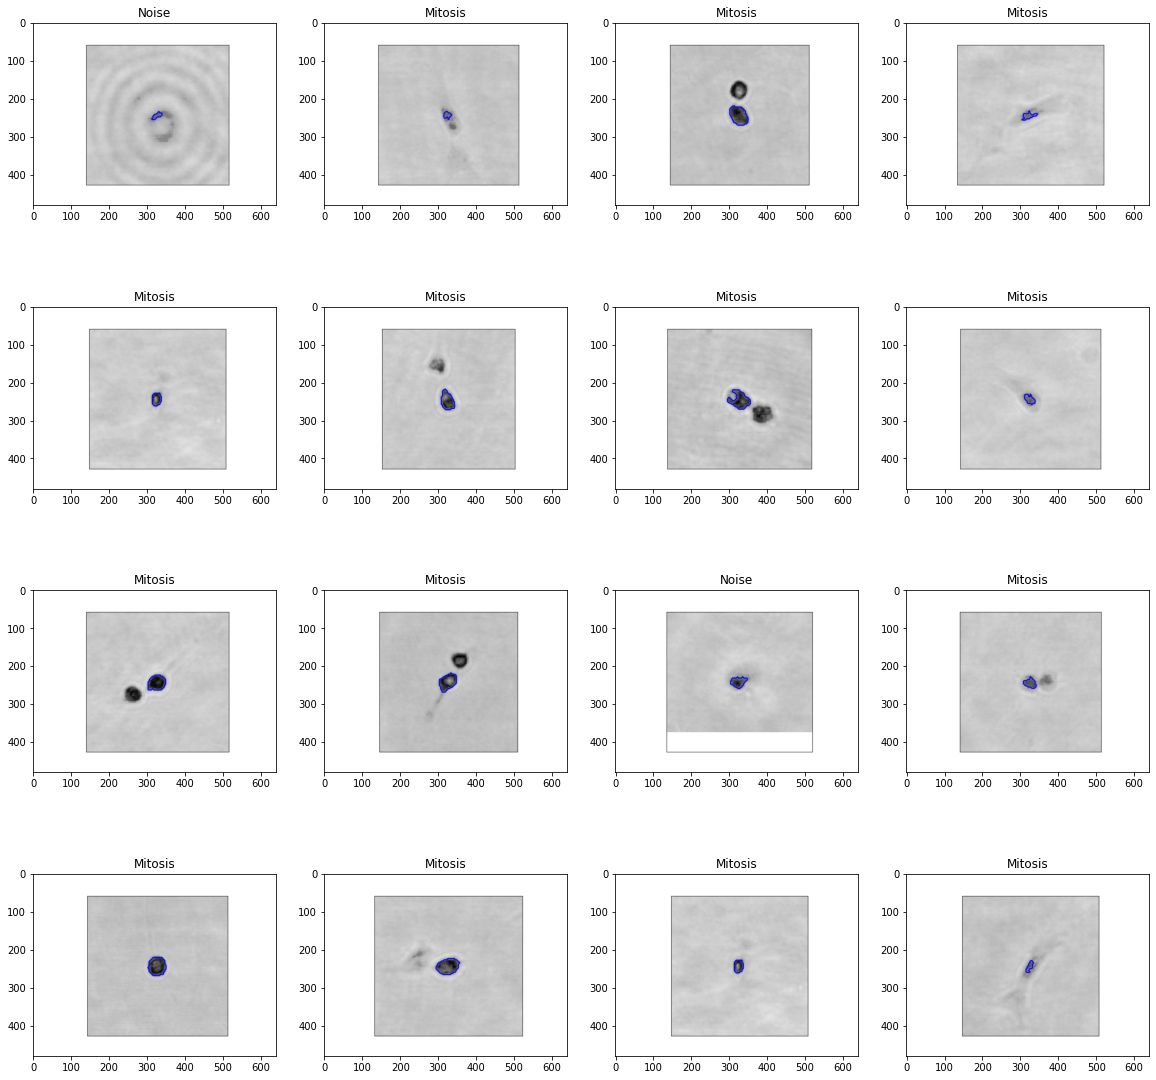

In [11]:
path_detected_frame = 'C:\\Belgium test Project\\Detected Mitotic frame\\'
en = os.listdir(path_detected_frame)
rand_ind = np.random.randint(0,len(en),size = 16)
lab_title = input_py['Class'].to_list()
plt.figure(figsize = (20,20))

for p in range(16):
    plt.subplot(4,4,p+1)
    im = cv2.imread(path_detected_frame + en[rand_ind[p]],-1)
    plt.imshow(im)
    plt.title(lab_title[rand_ind[p]])

In [12]:
Mito_set = input_py.loc[input_py['Label'] == 1]
Noise_set = input_py.loc[input_py['Label'] == 0]

Mito_set_features = Mito_set.drop(columns = ['Label','Class']).to_numpy()
Noise_set_features = Noise_set.drop(columns = ['Label','Class']).to_numpy()
feature_types = input_py.drop(columns = ['Label','Class']).columns

mu_mito = np.mean(Mito_set_features,axis = 0)
mu_noise = np.mean(Noise_set_features,axis = 0)

std_mito = np.std(Mito_set_features,axis = 0)
std_noise = np.std(Noise_set_features,axis = 0)

In [13]:
features_py = input_py.drop(columns = ['Label','Class']).to_numpy()
Label = input_py['Label'].to_numpy()

In [14]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [15]:
Tree = tree.DecisionTreeClassifier()
Tree_py = Tree.fit(features_py,Label)

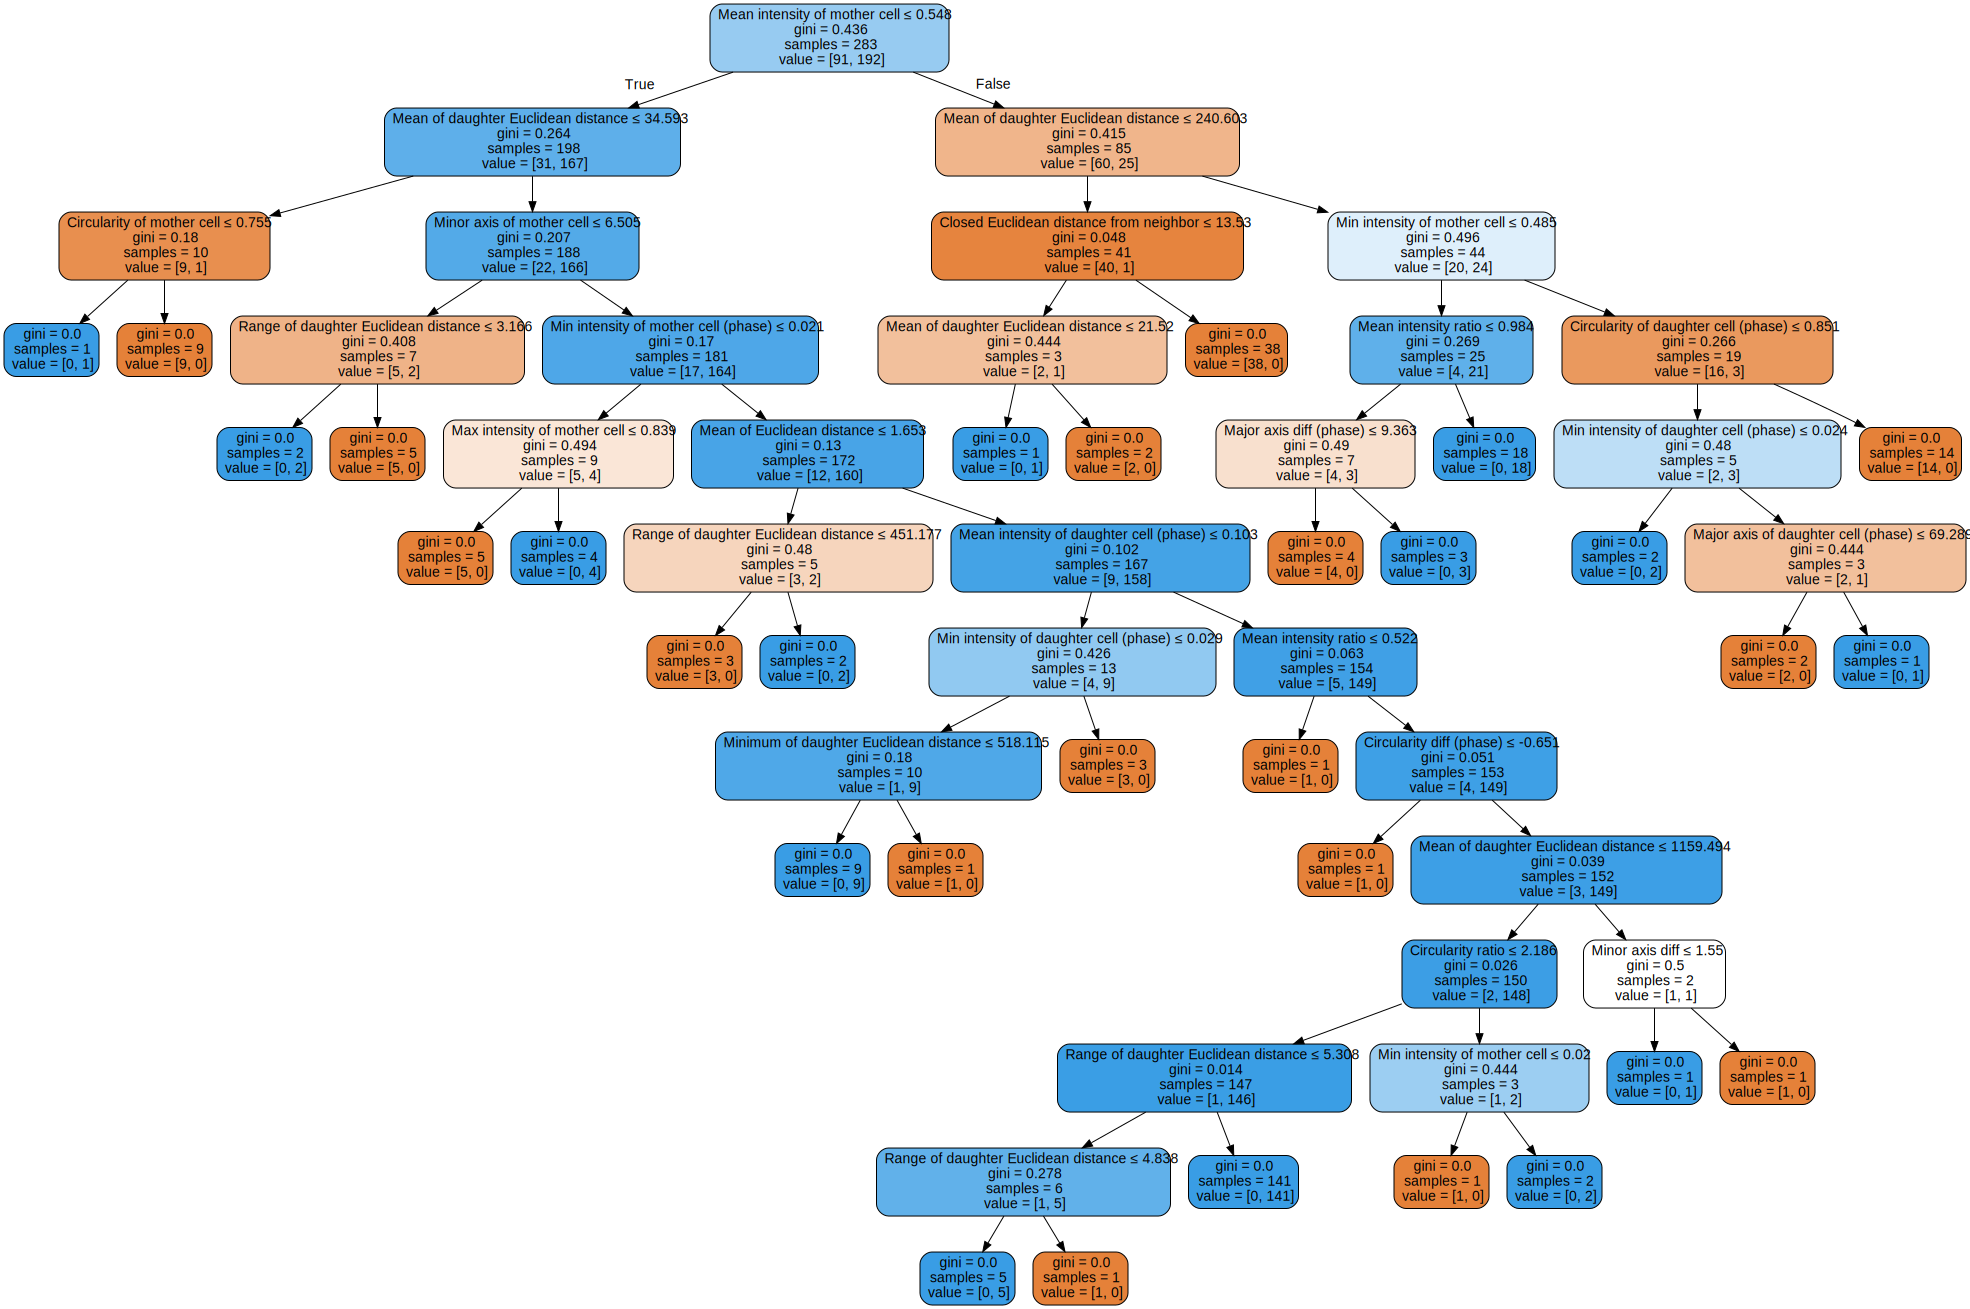

<Figure size 2160x2160 with 0 Axes>

In [16]:
dot_data = tree.export_graphviz(Tree_py, out_file=None, 
                      feature_names=features.columns,   
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_py = graphviz.Source(dot_data)
plt.figure(figsize = (30,30))
graph_py

<AxesSubplot:xlabel='Mean intensity of daughter cell', ylabel='Range of daughter Euclidean distance'>

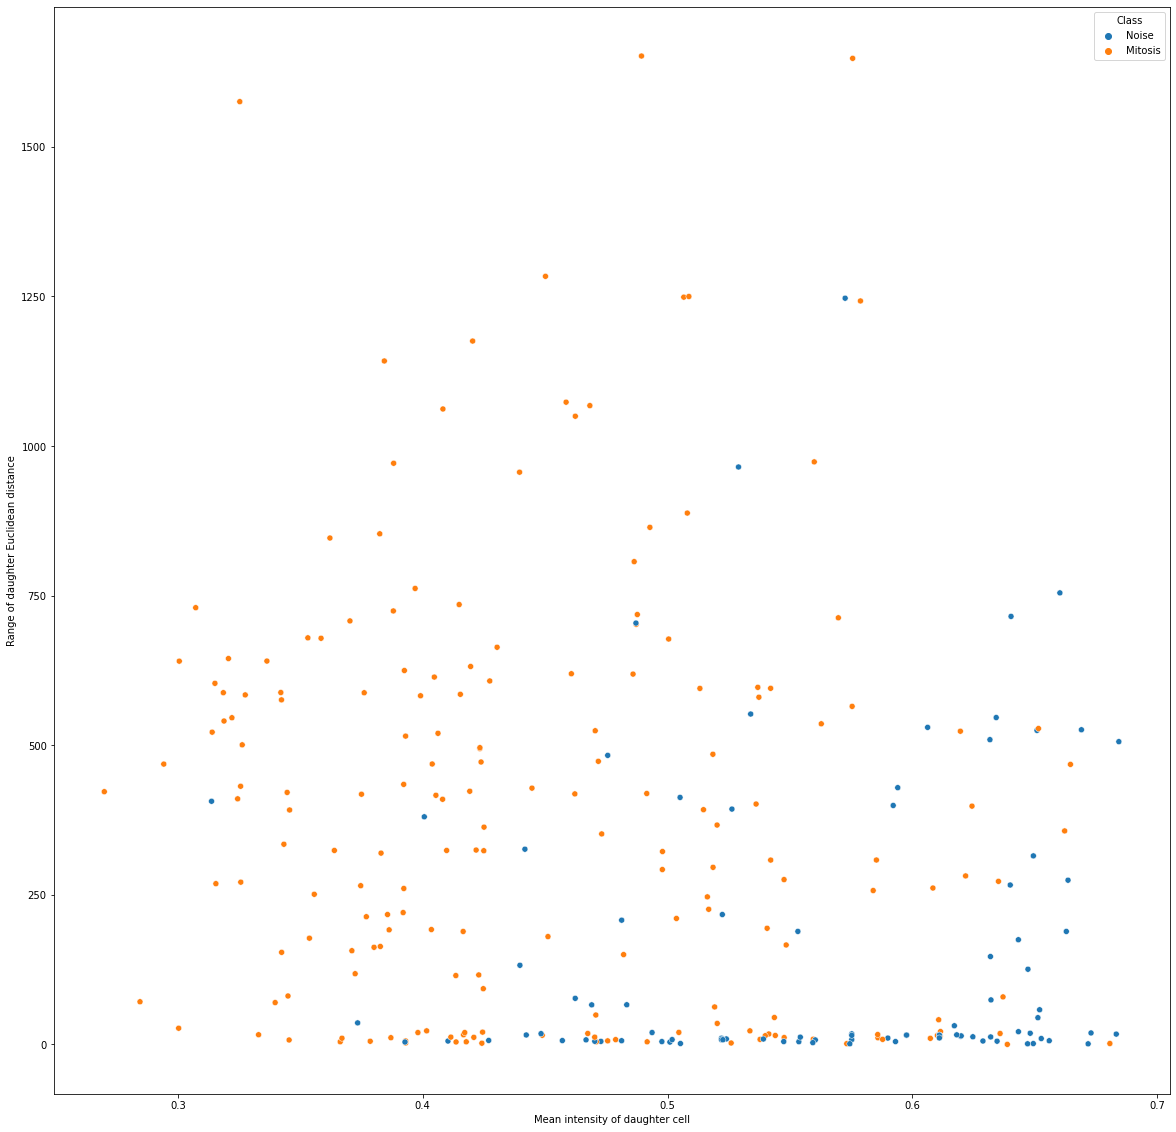

In [17]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = input_py, x = 'Mean intensity of daughter cell', 
                y = 'Range of daughter Euclidean distance', hue = 'Class')

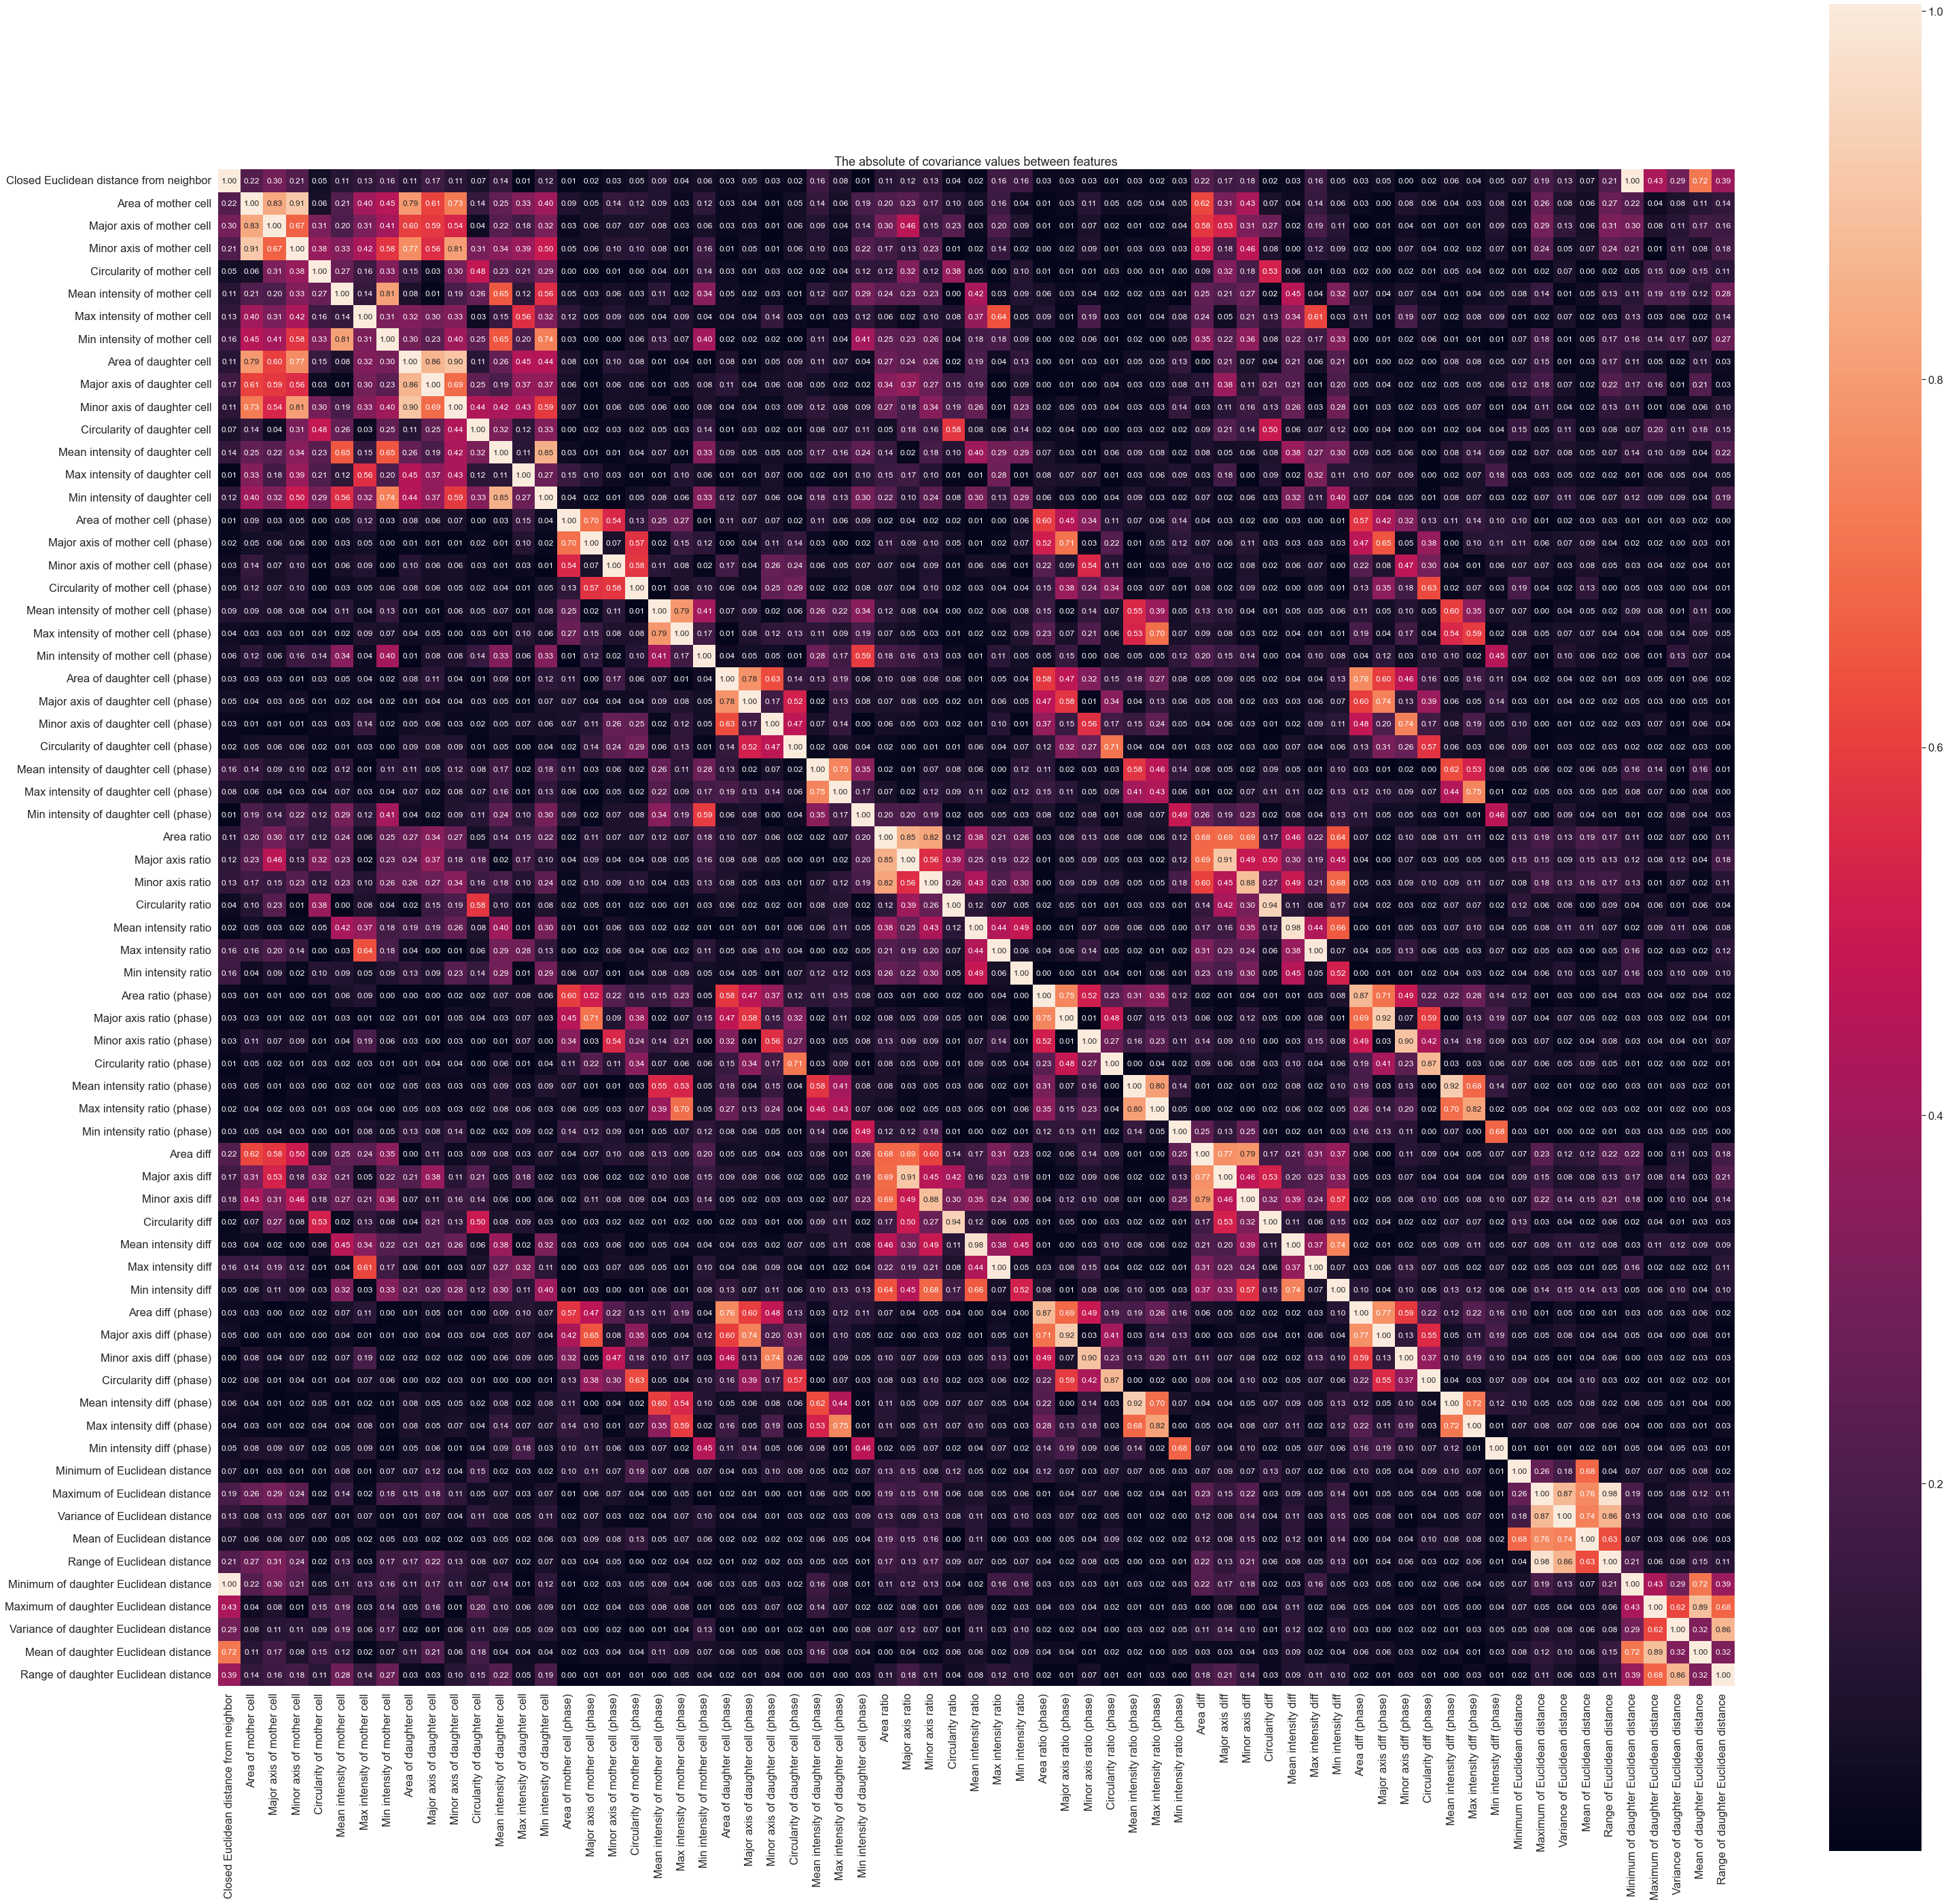

In [18]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(features_py)
cov_mat = np.cov(np.transpose(X_std))
cols = input_py.drop(columns = ['Label','Class']).columns
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
hm = sns.heatmap(abs(cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('The absolute of covariance values between features')
plt.savefig('COV matrix.pdf')

In [19]:
cons_feature_py = input_py.drop(columns = ['Label','Class'])

In [20]:
# Intensity characteristic group
icg_features = cons_feature_py[cols[1:13]]
icg_cols = icg_features.columns
icg_features.head()

Area of mother cell  Major axis of mother cell  Minor axis of mother cell  \
0                  183                  26.583904                  11.748395   
1                  172                  17.680191                  12.648826   
2                  114                  20.346158                  10.105628   
3                  158                  15.169490                  13.615230   
4                  254                  22.172410                  14.640794   

   Circularity of mother cell  Mean intensity of mother cell  \
0                    0.897046                       0.644907   
1                    0.698691                       0.448986   
2                    0.867931                       0.592680   
3                    0.440932                       0.341194   
4                    0.750988                       0.335856   

   Max intensity of mother cell  Min intensity of mother cell  \
0                      0.720595                      0.518093   
1                      0.953369                      0.028910   
2                      0.695651                      0.409033   
3                      0.694254                      0.007546   
4                      0.850694                      0.033636   

   Area of daughter cell  Major axis of daughter cell  \
0                    370                    30.573303   
1                    350                    36.131427   
2                    493                    27.676120   
3                    177                    18.754806   
4                    107                    14.049196   

   Minor axis of daughter cell  Circularity of daughter cell  \
0                    17.446161                      0.821205   
1                    13.178743                      0.931108   
2                    22.942821                      0.559285   
3                    12.945104                      0.723591   
4                     9.924959                      0.707770   

   Mean intensity of daughter cell  
0                         0.631684  
1                         0.422896  
2                         0.606235  
3                         0.400653  
4                         0.388128

Text(0.5, 1.0, 'The absolute of covariance values between intensity characteristic features group')

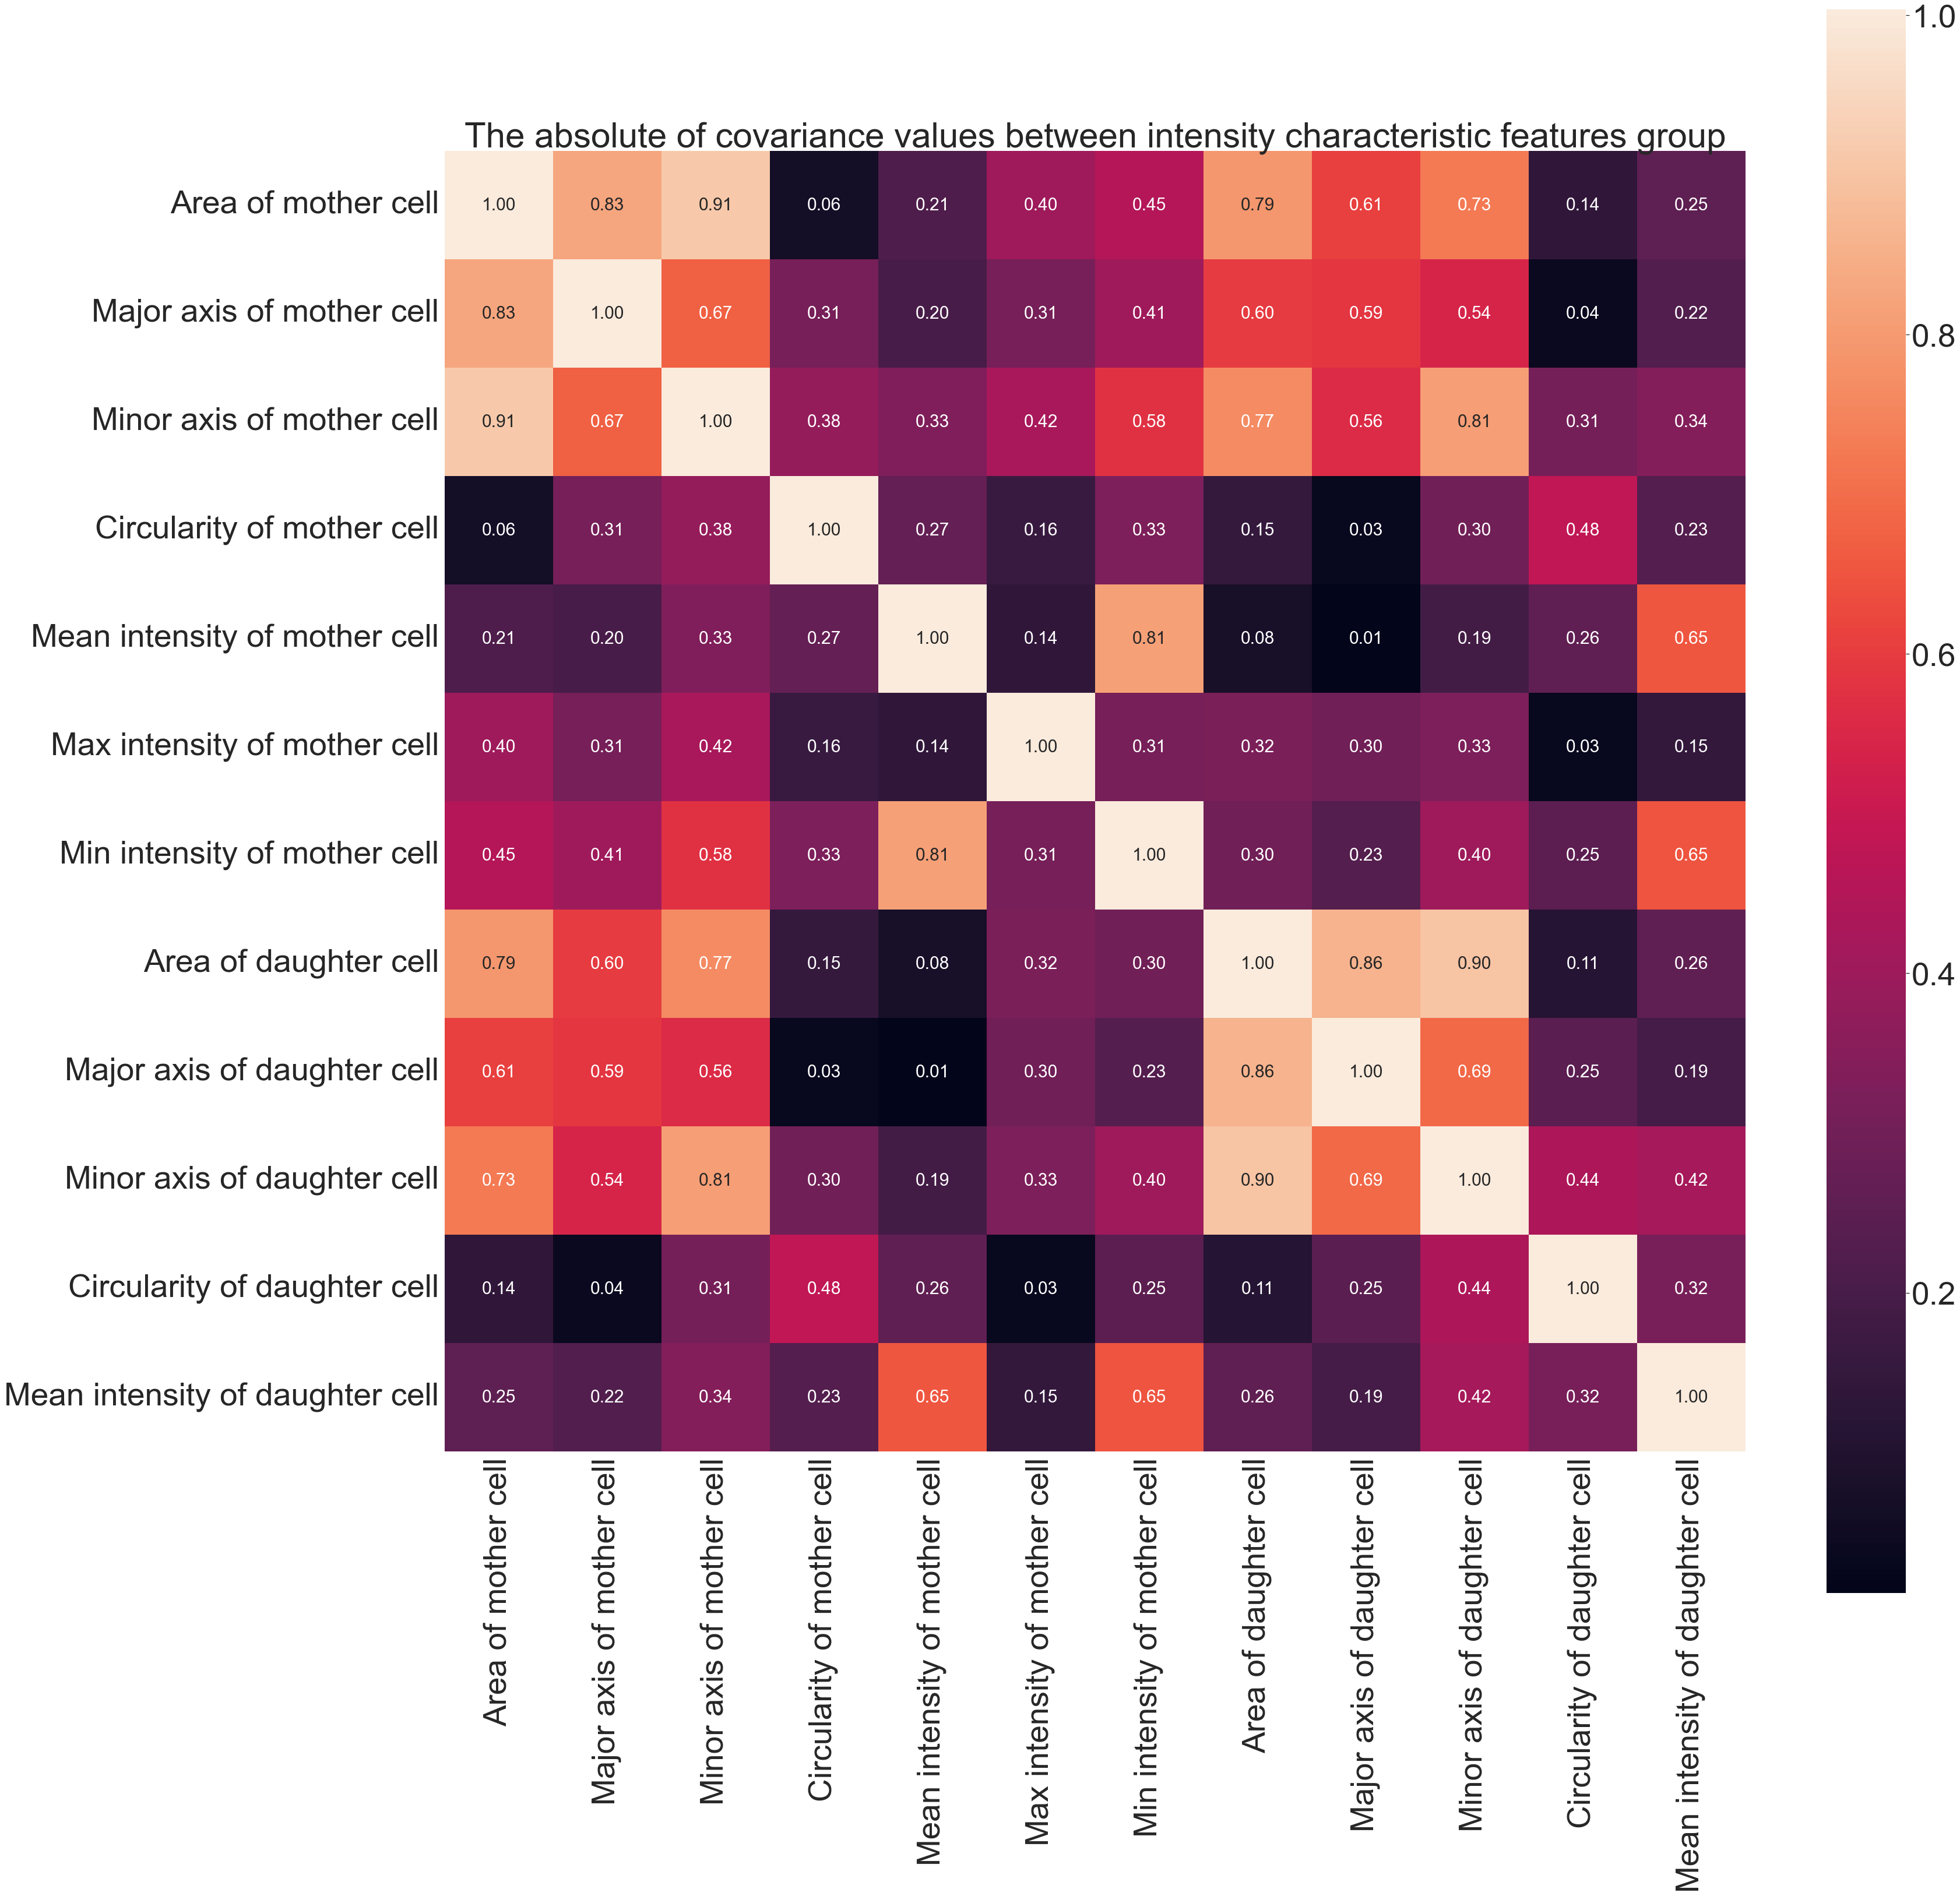

In [21]:
np_icg_features = icg_features.to_numpy()
icg_std = stdsc.fit_transform(np_icg_features)
cov_mat = np.cov(np.transpose(icg_std))
plt.figure(figsize=(50,50))
sns.set(font_scale=5)
hm_icg = sns.heatmap(abs(cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=icg_cols,
                 xticklabels=icg_cols)
plt.title('The absolute of covariance values between intensity characteristic features group')

In [22]:
sum_cov = np.sum(abs(cov_mat),axis = 1)
first_mnind_cg = np.argmin(sum_cov)
first_mn_cg = np.min(sum_cov)
sum_cov[first_mnind_cg] = np.inf
sec_mnind_cg = np.argmin(sum_cov)
sec_mn_cg = np.min(sum_cov)
sum_cov[sec_mnind_cg] = np.inf

first_mn_cg_pr = '%0.2f' % first_mn_cg
sec_mn_cg_pr = '%0.2f' % sec_mn_cg

print('The selected features are ' + icg_cols[first_mnind_cg] + ' and ' + icg_cols[sec_mnind_cg] + ' with sum of covariance ' +
     first_mn_cg_pr + ' and ' + sec_mn_cg_pr + ' respectively')

The selected features are Circularity of daughter cell and Circularity of mother cell with sum of covariance 3.62 and 3.71 respectively


In [23]:
res_icg_features = icg_features.drop(columns = [icg_cols[first_mnind_cg],icg_cols[sec_mnind_cg]])
res_icg_features.head()

Area of mother cell  Major axis of mother cell  Minor axis of mother cell  \
0                  183                  26.583904                  11.748395   
1                  172                  17.680191                  12.648826   
2                  114                  20.346158                  10.105628   
3                  158                  15.169490                  13.615230   
4                  254                  22.172410                  14.640794   

   Mean intensity of mother cell  Max intensity of mother cell  \
0                       0.644907                      0.720595   
1                       0.448986                      0.953369   
2                       0.592680                      0.695651   
3                       0.341194                      0.694254   
4                       0.335856                      0.850694   

   Min intensity of mother cell  Area of daughter cell  \
0                      0.518093                    370   
1                      0.028910                    350   
2                      0.409033                    493   
3                      0.007546                    177   
4                      0.033636                    107   

   Major axis of daughter cell  Minor axis of daughter cell  \
0                    30.573303                    17.446161   
1                    36.131427                    13.178743   
2                    27.676120                    22.942821   
3                    18.754806                    12.945104   
4                    14.049196                     9.924959   

   Mean intensity of daughter cell  
0                         0.631684  
1                         0.422896  
2                         0.606235  
3                         0.400653  
4                         0.388128

In [24]:
np_res_icg = res_icg_features.to_numpy()
pca = PCA(n_components = 2)
pca_icg = pca.fit(np_res_icg)
weight_vec = pca.components_
mixed_icg_features = np.matmul(np_res_icg,np.transpose(weight_vec[0,:]))

In [25]:
pd_mixed_icg_features = pd.DataFrame(columns = ['Mixed characteristic of cells'], data = mixed_icg_features)
selected_icg_features = pd_mixed_icg_features.merge(icg_features[[icg_cols[first_mnind_cg],
                                                                  icg_cols[sec_mnind_cg]]],left_index = True,right_index=True)
selected_icg_features.head()

Mixed characteristic of cells  Circularity of daughter cell  \
0                     369.277340                      0.821205   
1                     348.350950                      0.931108   
2                     386.780881                      0.559285   
3                     233.699555                      0.723591   
4                     269.173968                      0.707770   

   Circularity of mother cell  
0                    0.897046  
1                    0.698691  
2                    0.867931  
3                    0.440932  
4                    0.750988

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

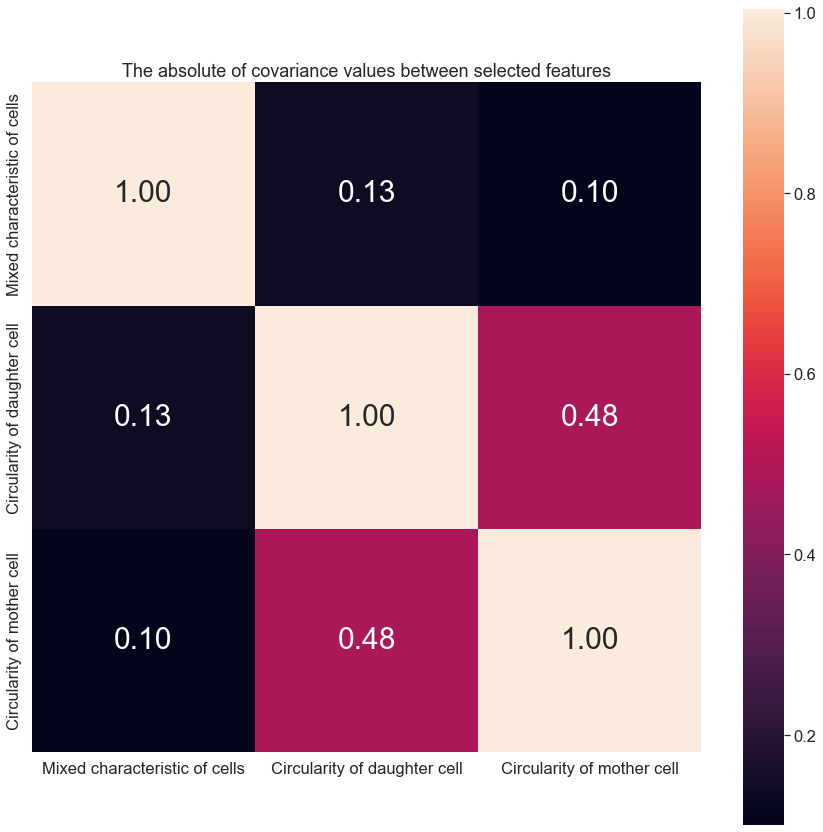

In [26]:
selected_icg_features_np = selected_icg_features.to_numpy()
selected_icg_features_cols = selected_icg_features.columns
selected_icg_features_std = stdsc.fit_transform(selected_icg_features_np)
selected_icg_features_cov_mat = np.cov(np.transpose(selected_icg_features_std))
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm_selected_icg = sns.heatmap(abs(selected_icg_features_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=selected_icg_features_cols,
                 xticklabels=selected_icg_features_cols)
plt.title('The absolute of covariance values between selected features')

In [27]:
# Phase mother cells characteristic group
pmc_features = cons_feature_py[cols[13:20]]
pmc_cols = pmc_features.columns
pmc_features.head()

Max intensity of daughter cell  Min intensity of daughter cell  \
0                        0.715977                        0.509469   
1                        1.073536                        0.018473   
2                        0.800995                        0.443364   
3                        0.699599                        0.057991   
4                        0.692001                        0.032313   

   Area of mother cell (phase)  Major axis of mother cell (phase)  \
0                          609                          48.120840   
1                          608                          44.784564   
2                         1092                          54.902815   
3                          768                          70.781665   
4                         1149                          68.389875   

   Minor axis of mother cell (phase)  Circularity of mother cell (phase)  \
0                          22.553037                            0.883371   
1                          18.837630                            0.907233   
2                          26.547314                            0.875326   
3                          24.608956                            0.937615   
4                          25.606552                            0.927259   

   Mean intensity of mother cell (phase)  
0                               0.089113  
1                               0.092895  
2                               0.205167  
3                               0.091523  
4                               0.209149

Text(0.5, 1.0, 'The absolute of covariance values between phase mother cells characteristic group')

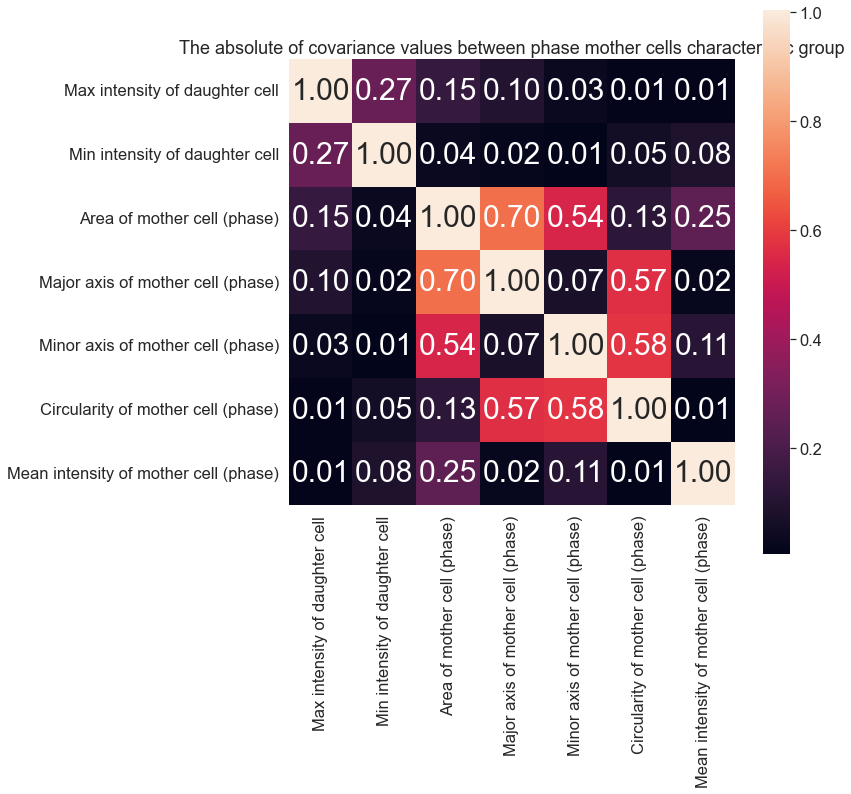

In [28]:
np_pmc_features = pmc_features.to_numpy()
pmc_std = stdsc.fit_transform(np_pmc_features)
pmc_cov_mat = np.cov(np.transpose(pmc_std))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_icg = sns.heatmap(abs(pmc_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=pmc_cols,
                 xticklabels=pmc_cols)
plt.title('The absolute of covariance values between phase mother cells characteristic group')

In [29]:
sum_pmc_cov = np.sum(abs(pmc_cov_mat),axis = 1)
first_mnind_cg = np.argmin(sum_pmc_cov)
first_mn_cg = np.min(sum_pmc_cov)
sum_pmc_cov[first_mnind_cg] = np.inf

first_mn_cg_pr = '%0.2f' % first_mn_cg

print('The selected features is ' + pmc_cols[first_mnind_cg] + ' with sum of covariance ' +
     first_mn_cg_pr + ' respectively')

The selected features is Min intensity of daughter cell with sum of covariance 1.47 respectively


In [30]:
res_pmc_features = pmc_features.drop(columns = [pmc_cols[first_mnind_cg]])
res_pmc_features.head()

Max intensity of daughter cell  Area of mother cell (phase)  \
0                        0.715977                          609   
1                        1.073536                          608   
2                        0.800995                         1092   
3                        0.699599                          768   
4                        0.692001                         1149   

   Major axis of mother cell (phase)  Minor axis of mother cell (phase)  \
0                          48.120840                          22.553037   
1                          44.784564                          18.837630   
2                          54.902815                          26.547314   
3                          70.781665                          24.608956   
4                          68.389875                          25.606552   

   Circularity of mother cell (phase)  Mean intensity of mother cell (phase)  
0                            0.883371                               0.089113  
1                            0.907233                               0.092895  
2                            0.875326                               0.205167  
3                            0.937615                               0.091523  
4                            0.927259                               0.209149

In [31]:
np_res_pmc = res_pmc_features.to_numpy()
pca = PCA(n_components = 2)
pca_pmc = pca.fit(np_res_pmc)
weight_vec = pca_pmc.components_
mixed_pmc_features = np.matmul(np_res_pmc,np.transpose(weight_vec[0,:]))

In [32]:
pd_mixed_pmc_features = pd.DataFrame(columns = ['Mixed phase characteristic of mother cells'], data = mixed_pmc_features)
selected_pmc_features = pd_mixed_pmc_features.merge(pmc_features[pmc_cols[first_mnind_cg]],left_index = True,right_index=True)
selected_pmc_features.head()

Mixed phase characteristic of mother cells  Min intensity of daughter cell
0                                  610.700135                        0.509469
1                                  609.521749                        0.018473
2                                 1093.551590                        0.443364
3                                  770.550457                        0.057991
4                                 1151.075560                        0.032313

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

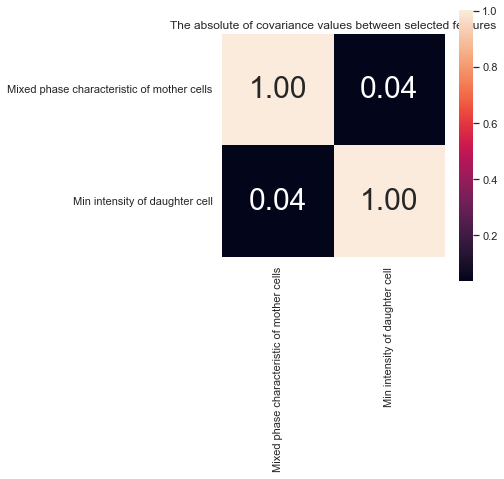

In [33]:
selected_pmc_features_np = selected_pmc_features.to_numpy()
selected_pmc_features_cols = selected_pmc_features.columns
selected_pmc_features_std = stdsc.fit_transform(selected_pmc_features_np)
selected_pmc_features_cov_mat = np.cov(np.transpose(selected_pmc_features_std))
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
hm_selected_icg = sns.heatmap(abs(selected_pmc_features_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=selected_pmc_features_cols,
                 xticklabels=selected_pmc_features_cols)
plt.title('The absolute of covariance values between selected features')

In [34]:
# Phase daughter cells characteristic group
pdc_features = cons_feature_py[cols[20:27]]
pdc_cols = pdc_features.columns
pdc_features.head()

Max intensity of mother cell (phase)  Min intensity of mother cell (phase)  \
0                              0.230328                              0.016267   
1                              0.256263                              0.016421   
2                              0.465668                              0.016622   
3                              0.227901                              0.015746   
4                              0.484081                              0.037920   

   Area of daughter cell (phase)  Major axis of daughter cell (phase)  \
0                           2353                           134.176157   
1                           1305                            60.844286   
2                            657                            36.748338   
3                           1161                            62.697975   
4                            999                            58.378852   

   Minor axis of daughter cell (phase)  Circularity of daughter cell (phase)  \
0                            34.030650                              0.967302   
1                            32.042118                              0.850098   
2                            24.712257                              0.740122   
3                            27.331608                              0.899983   
4                            25.218225                              0.901885   

   Mean intensity of daughter cell (phase)  
0                                 0.159232  
1                                 0.175780  
2                                 0.074114  
3                                 0.167658  
4                                 0.203995

Text(0.5, 1.0, 'The absolute of covariance values between phase daughter cells characteristic group')

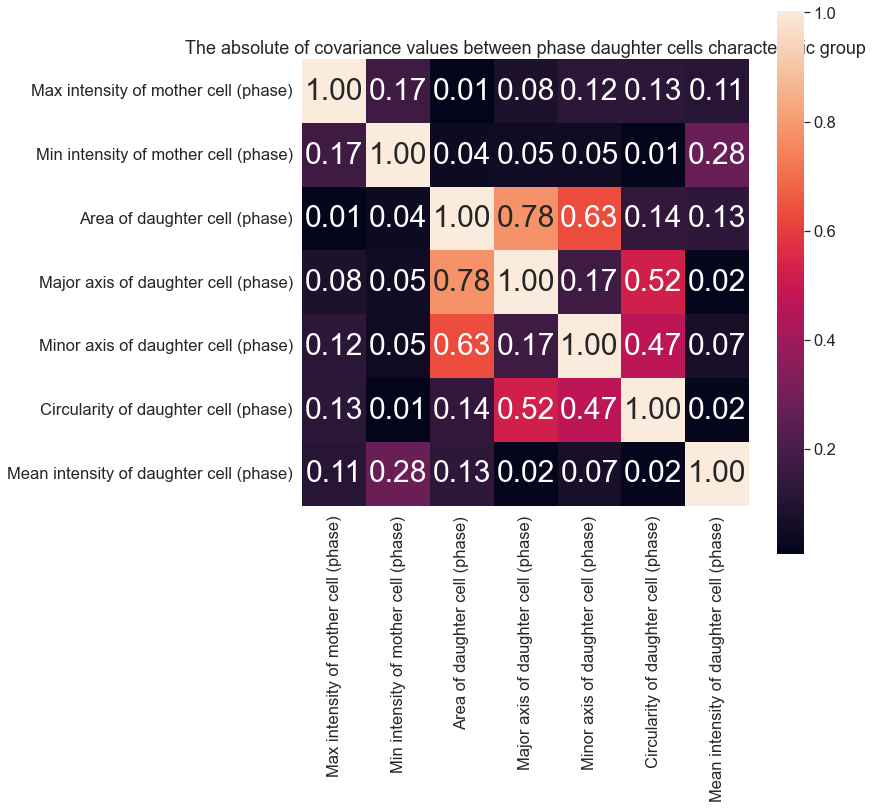

In [35]:
np_pdc_features = pdc_features.to_numpy()
pdc_std = stdsc.fit_transform(np_pdc_features)
pdc_cov_mat = np.cov(np.transpose(pdc_std))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_icg = sns.heatmap(abs(pdc_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=pdc_cols,
                 xticklabels=pdc_cols)
plt.title('The absolute of covariance values between phase daughter cells characteristic group')

In [36]:
sum_pdc_cov = np.sum(abs(pdc_cov_mat),axis = 1)
first_mnind_cg = np.argmin(sum_pdc_cov)
first_mn_cg = np.min(sum_pdc_cov)
sum_pdc_cov[first_mnind_cg] = np.inf

first_mn_cg_pr = '%0.2f' % first_mn_cg

print('The selected features is ' + pdc_cols[first_mnind_cg] + ' with sum of covariance ' +
     first_mn_cg_pr)

The selected features is Min intensity of mother cell (phase) with sum of covariance 1.61


In [37]:
res_pdc_features = pdc_features.drop(columns = [pdc_cols[first_mnind_cg]])
res_pdc_features.head()

Max intensity of mother cell (phase)  Area of daughter cell (phase)  \
0                              0.230328                           2353   
1                              0.256263                           1305   
2                              0.465668                            657   
3                              0.227901                           1161   
4                              0.484081                            999   

   Major axis of daughter cell (phase)  Minor axis of daughter cell (phase)  \
0                           134.176157                            34.030650   
1                            60.844286                            32.042118   
2                            36.748338                            24.712257   
3                            62.697975                            27.331608   
4                            58.378852                            25.218225   

   Circularity of daughter cell (phase)  \
0                              0.967302   
1                              0.850098   
2                              0.740122   
3                              0.899983   
4                              0.901885   

   Mean intensity of daughter cell (phase)  
0                                 0.159232  
1                                 0.175780  
2                                 0.074114  
3                                 0.167658  
4                                 0.203995

In [38]:
np_res_pdc = res_pdc_features.to_numpy()
pca = PCA(n_components = 2)
pca_pdc = pca.fit(np_res_pdc)
weight_vec = pca_pdc.components_
mixed_pdc_features = np.matmul(np_res_pdc,np.transpose(weight_vec[0,:]))

In [39]:
pd_mixed_pdc_features = pd.DataFrame(columns = ['Mixed phase characteristic of daughter cells'], data = mixed_pdc_features)
selected_pdc_features = pd_mixed_pdc_features.merge(pdc_features[pdc_cols[first_mnind_cg]],left_index = True,right_index=True)
selected_pdc_features.head()

Mixed phase characteristic of daughter cells  \
0                                   2356.849776   
1                                   1306.686033   
2                                    658.210984   
3                                   1162.862068   
4                                   1000.814838   

   Min intensity of mother cell (phase)  
0                              0.016267  
1                              0.016421  
2                              0.016622  
3                              0.015746  
4                              0.037920

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

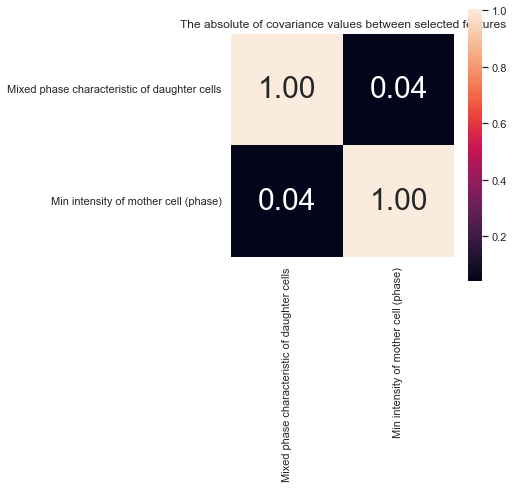

In [40]:
selected_pdc_features_np = selected_pdc_features.to_numpy()
selected_pdc_features_cols = selected_pdc_features.columns
selected_pdc_features_std = stdsc.fit_transform(selected_pdc_features_np)
selected_pdc_features_cov_mat = np.cov(np.transpose(selected_pdc_features_std))
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
hm_selected_icg = sns.heatmap(abs(selected_pdc_features_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=selected_pdc_features_cols,
                 xticklabels=selected_pdc_features_cols)
plt.title('The absolute of covariance values between selected features')

In [41]:
# Ratio and diff characteristic group
rd_features = cons_feature_py[cols[27:34]]
rd_cols = rd_features.columns
rd_features.head()

Max intensity of daughter cell (phase)  \
0                                0.440103   
1                                0.606427   
2                                0.199462   
3                                0.518681   
4                                0.592618   

   Min intensity of daughter cell (phase)  Area ratio  Major axis ratio  \
0                                0.004004    0.494595          0.869514   
1                                0.011552    0.491429          0.489330   
2                                0.003343    0.231237          0.735152   
3                                0.003297    0.892655          0.808832   
4                                0.032369    2.373832          1.578198   

   Minor axis ratio  Circularity ratio  Mean intensity ratio  
0          0.673409           1.092354              1.020932  
1          0.959790           0.750387              1.061694  
2          0.440470           1.551858              0.977641  
3          1.051767           0.609366              0.851595  
4          1.475149           1.061063              0.865322

Text(0.5, 1.0, 'The absolute of covariance values between ratio and diff characteristic group')

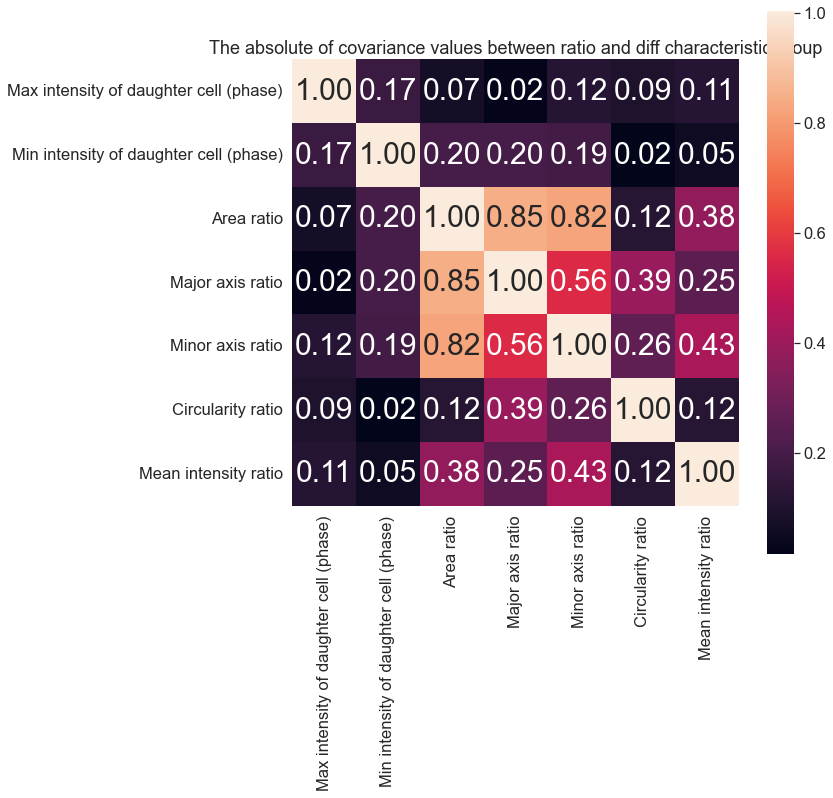

In [42]:
np_rd_features = rd_features.to_numpy()
rd_std = stdsc.fit_transform(np_rd_features)
rd_cov_mat = np.cov(np.transpose(rd_std))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_icg = sns.heatmap(abs(rd_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=rd_cols,
                 xticklabels=rd_cols)
plt.title('The absolute of covariance values between ratio and diff characteristic group')

In [43]:
sum_rd_cov = np.sum(abs(rd_cov_mat),axis = 1)
first_mnind_cg = np.argmin(sum_rd_cov)
first_mn_cg = np.min(sum_rd_cov)
sum_rd_cov[first_mnind_cg] = np.inf

first_mn_cg_pr = '%0.2f' % first_mn_cg

print('The selected features is ' + rd_cols[first_mnind_cg] + ' with sum of covariance ' +
     first_mn_cg_pr)

The selected features is Max intensity of daughter cell (phase) with sum of covariance 1.58


In [44]:
res_rd_features = rd_features.drop(columns = [rd_cols[first_mnind_cg]])
res_rd_features.head()

Min intensity of daughter cell (phase)  Area ratio  Major axis ratio  \
0                                0.004004    0.494595          0.869514   
1                                0.011552    0.491429          0.489330   
2                                0.003343    0.231237          0.735152   
3                                0.003297    0.892655          0.808832   
4                                0.032369    2.373832          1.578198   

   Minor axis ratio  Circularity ratio  Mean intensity ratio  
0          0.673409           1.092354              1.020932  
1          0.959790           0.750387              1.061694  
2          0.440470           1.551858              0.977641  
3          1.051767           0.609366              0.851595  
4          1.475149           1.061063              0.865322

In [45]:
np_res_rd = res_rd_features.to_numpy()
pca = PCA(n_components = 2)
pca_rd = pca.fit(np_res_rd)
weight_vec = pca_rd.components_
mixed_rd_features = np.matmul(np_res_rd,np.transpose(weight_vec[0,:]))

In [46]:
pd_mixed_rd_features = pd.DataFrame(columns = ['Mixed ratio characteristic of mother cells'], data = mixed_rd_features)
selected_rd_features = pd_mixed_rd_features.merge(rd_features[rd_cols[first_mnind_cg]],left_index = True,right_index=True)
selected_rd_features.head()

Mixed ratio characteristic of mother cells  \
0                                    0.931704   
1                                    0.829303   
2                                    0.616674   
3                                    1.339550   
4                                    3.075132   

   Max intensity of daughter cell (phase)  
0                                0.440103  
1                                0.606427  
2                                0.199462  
3                                0.518681  
4                                0.592618

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

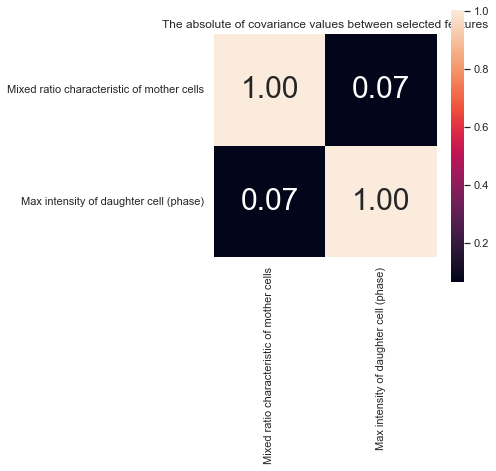

In [47]:
selected_rd_features_np = selected_rd_features.to_numpy()
selected_rd_features_cols = selected_rd_features.columns
selected_rd_features_std = stdsc.fit_transform(selected_rd_features_np)
selected_rd_features_cov_mat = np.cov(np.transpose(selected_rd_features_std))
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
hm_selected_icg = sns.heatmap(abs(selected_rd_features_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=selected_rd_features_cols,
                 xticklabels=selected_rd_features_cols)
plt.title('The absolute of covariance values between selected features')

In [48]:
# Mother cell movement characteristic group
mcm_features = cons_feature_py[cols[57:62]]
mcm_cols = mcm_features.columns
mcm_features.head()

Minimum of Euclidean distance  Maximum of Euclidean distance  \
0                       1.062025                      10.864424   
1                       3.108966                      39.260804   
2                       1.474919                       9.553238   
3                       0.654779                       5.863764   
4                       1.104130                      19.798679   

   Variance of Euclidean distance  Mean of Euclidean distance  \
0                       13.719952                    3.763046   
1                      159.847230                   11.191935   
2                       12.518744                    4.214566   
3                        5.299113                    3.882513   
4                       34.963790                    5.332416   

   Range of Euclidean distance  
0                     9.802399  
1                    36.151838  
2                     8.078320  
3                     5.208984  
4                    18.694549

Text(0.5, 1.0, 'The absolute of covariance values between mother cell movement characteristic group')

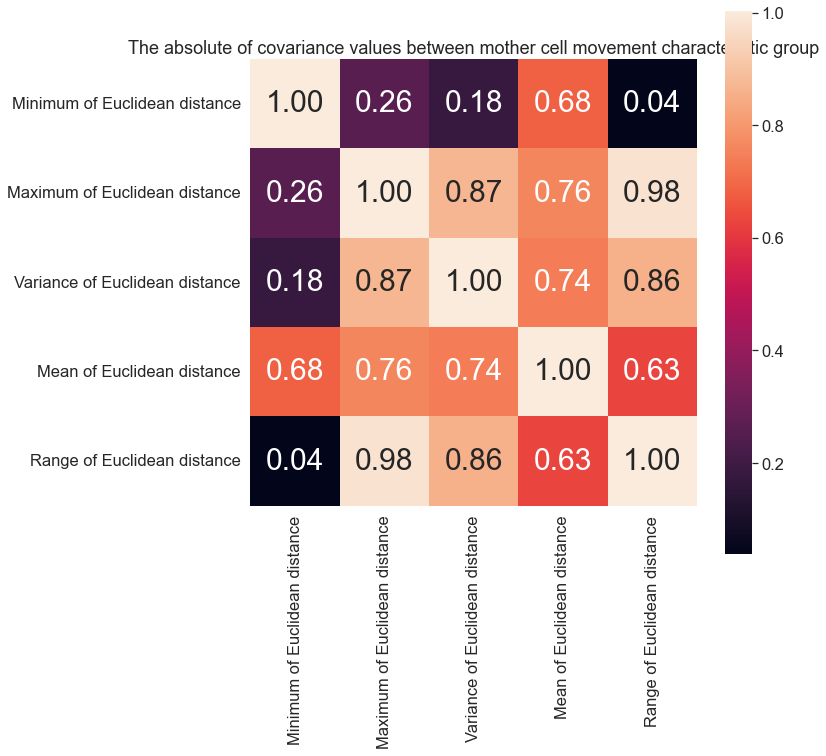

In [49]:
np_mcm_features = mcm_features.to_numpy()
mcm_std = stdsc.fit_transform(np_mcm_features)
mcm_cov_mat = np.cov(np.transpose(mcm_std))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_icg = sns.heatmap(abs(mcm_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=mcm_cols,
                 xticklabels=mcm_cols)
plt.title('The absolute of covariance values between mother cell movement characteristic group')

In [50]:
sum_mcm_cov = np.sum(abs(mcm_cov_mat),axis = 1)
first_mnind_cg = np.argmin(sum_mcm_cov)
first_mn_cg = np.min(sum_mcm_cov)
sum_mcm_cov[first_mnind_cg] = np.inf

first_mn_cg_pr = '%0.2f' % first_mn_cg

print('The selected features is ' + mcm_cols[first_mnind_cg] + ' with sum of covariance ' +
     first_mn_cg_pr)

The selected features is Minimum of Euclidean distance with sum of covariance 2.16


In [51]:
res_mcm_features = mcm_features.drop(columns = [mcm_cols[first_mnind_cg]])
res_mcm_features.head()

Maximum of Euclidean distance  Variance of Euclidean distance  \
0                      10.864424                       13.719952   
1                      39.260804                      159.847230   
2                       9.553238                       12.518744   
3                       5.863764                        5.299113   
4                      19.798679                       34.963790   

   Mean of Euclidean distance  Range of Euclidean distance  
0                    3.763046                     9.802399  
1                   11.191935                    36.151838  
2                    4.214566                     8.078320  
3                    3.882513                     5.208984  
4                    5.332416                    18.694549

In [52]:
np_res_mcm = res_mcm_features.to_numpy()
pca = PCA(n_components = 2)
pca_mcm = pca.fit(np_res_mcm)
weight_vec = pca_mcm.components_
mixed_mcm_features = np.matmul(np_res_mcm,np.transpose(weight_vec[0,:]))

In [53]:
pd_mixed_mcm_features = pd.DataFrame(columns = ['Mixed movement characteristic of mother cells'], data = mixed_mcm_features)
selected_mcm_features = pd_mixed_mcm_features.merge(mcm_features[mcm_cols[first_mnind_cg]],left_index = True,right_index=True)
selected_mcm_features.head()

Mixed movement characteristic of mother cells  \
0                                      17.050747   
1                                     168.373284   
2                                      15.400865   
3                                       7.267524   
4                                      40.760577   

   Minimum of Euclidean distance  
0                       1.062025  
1                       3.108966  
2                       1.474919  
3                       0.654779  
4                       1.104130

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

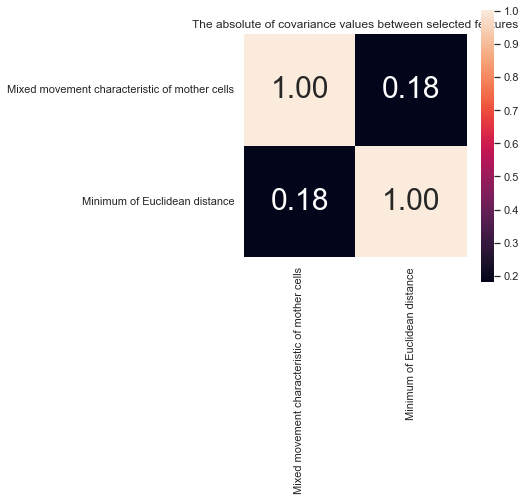

In [54]:
selected_mcm_features_np = selected_mcm_features.to_numpy()
selected_mcm_features_cols = selected_mcm_features.columns
selected_mcm_features_std = stdsc.fit_transform(selected_mcm_features_np)
selected_mcm_features_cov_mat = np.cov(np.transpose(selected_mcm_features_std))
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
hm_selected_icg = sns.heatmap(abs(selected_mcm_features_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=selected_mcm_features_cols,
                 xticklabels=selected_mcm_features_cols)
plt.title('The absolute of covariance values between selected features')

In [55]:
# Daughter cell movement characteristic group
dcm_features = cons_feature_py[cols[62:67]]
dcm_cols = dcm_features.columns
dcm_features.head()

Minimum of daughter Euclidean distance  \
0                               14.161159   
1                              183.201726   
2                               20.366627   
3                               28.764848   
4                               12.373335   

   Maximum of daughter Euclidean distance  \
0                              523.491968   
1                              299.358336   
2                              550.247011   
3                              409.172739   
4                              983.644018   

   Variance of daughter Euclidean distance  \
0                             36290.858247   
1                              1759.441044   
2                             58074.389099   
3                             31268.827008   
4                            112685.547741   

   Mean of daughter Euclidean distance  Range of daughter Euclidean distance  
0                           149.375134                            509.330809  
1                           274.084614                            116.156610  
2                           196.493793                            529.880385  
3                           278.762048                            380.407891  
4                           484.491851                            971.270683

Text(0.5, 1.0, 'The absolute of covariance values between daughter cell movement characteristic group')

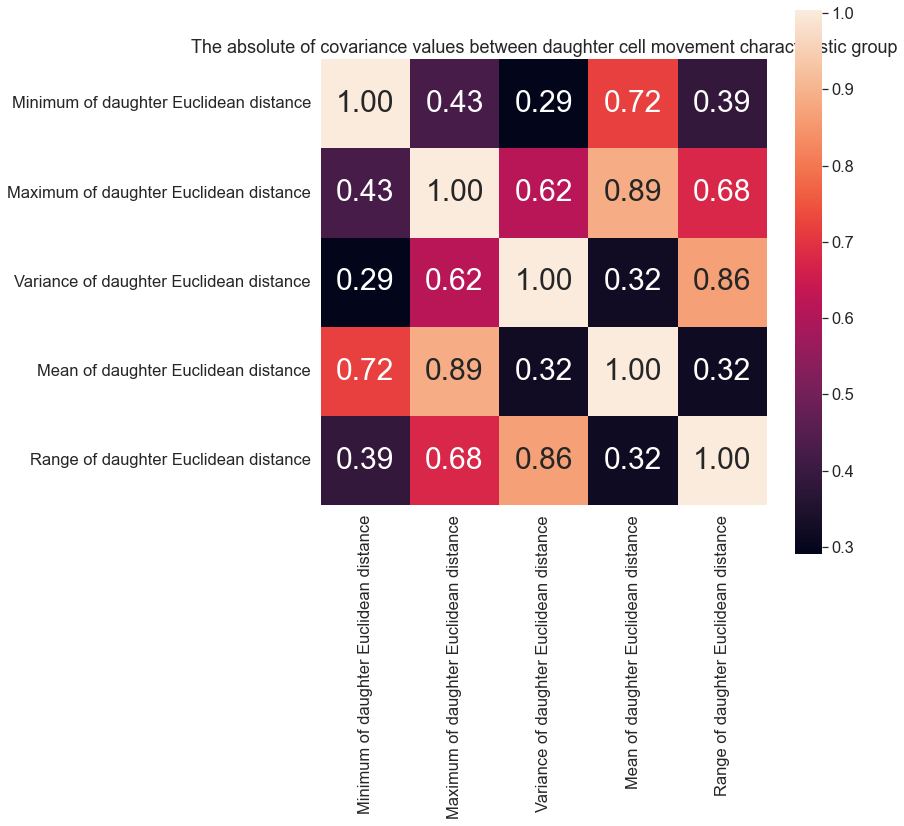

In [56]:
np_dcm_features = dcm_features.to_numpy()
dcm_std = stdsc.fit_transform(np_dcm_features)
dcm_cov_mat = np.cov(np.transpose(dcm_std))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_icg = sns.heatmap(abs(dcm_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=dcm_cols,
                 xticklabels=dcm_cols)
plt.title('The absolute of covariance values between daughter cell movement characteristic group')

In [57]:
sum_dcm_cov = np.sum(abs(dcm_cov_mat),axis = 1)
first_mnind_cg = np.argmin(sum_dcm_cov)
first_mn_cg = np.min(sum_dcm_cov)
sum_dcm_cov[first_mnind_cg] = np.inf

first_mn_cg_pr = '%0.2f' % first_mn_cg

print('The selected features is ' + dcm_cols[first_mnind_cg] + ' with sum of covariance ' +
     first_mn_cg_pr)

The selected features is Minimum of daughter Euclidean distance with sum of covariance 2.82


In [58]:
res_dcm_features = dcm_features.drop(columns = [dcm_cols[first_mnind_cg]])
res_dcm_features.head()

Maximum of daughter Euclidean distance  \
0                              523.491968   
1                              299.358336   
2                              550.247011   
3                              409.172739   
4                              983.644018   

   Variance of daughter Euclidean distance  \
0                             36290.858247   
1                              1759.441044   
2                             58074.389099   
3                             31268.827008   
4                            112685.547741   

   Mean of daughter Euclidean distance  Range of daughter Euclidean distance  
0                           149.375134                            509.330809  
1                           274.084614                            116.156610  
2                           196.493793                            529.880385  
3                           278.762048                            380.407891  
4                           484.491851                            971.270683

In [59]:
np_res_dcm = res_dcm_features.to_numpy()
pca = PCA(n_components = 2)
pca_dcm = pca.fit(np_res_dcm)
weight_vec = pca_dcm.components_
mixed_dcm_features = np.matmul(np_res_dcm,np.transpose(weight_vec[0,:]))

In [60]:
pd_mixed_dcm_features = pd.DataFrame(columns = ['Mixed movement characteristic of daughter cells'], data = mixed_dcm_features)
selected_dcm_features = pd_mixed_dcm_features.merge(dcm_features[dcm_cols[first_mnind_cg]],left_index = True,right_index=True)
selected_dcm_features.head()

Mixed movement characteristic of daughter cells  \
0                                     36294.481350   
1                                      1761.292394   
2                                     58077.897127   
3                                     31271.751768   
4                                    112691.962528   

   Minimum of daughter Euclidean distance  
0                               14.161159  
1                              183.201726  
2                               20.366627  
3                               28.764848  
4                               12.373335

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

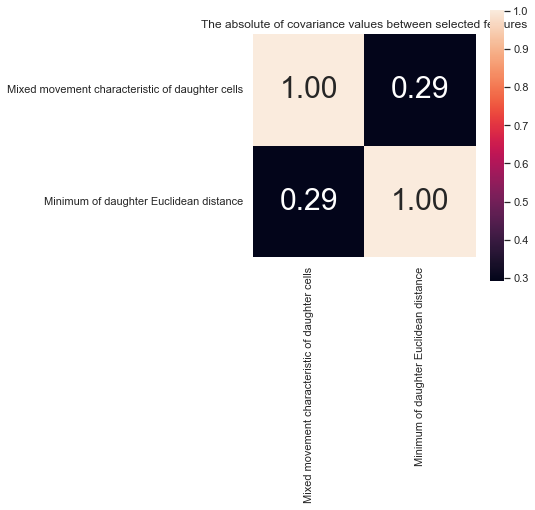

In [61]:
selected_dcm_features_np = selected_dcm_features.to_numpy()
selected_dcm_features_cols = selected_dcm_features.columns
selected_dcm_features_std = stdsc.fit_transform(selected_dcm_features_np)
selected_dcm_features_cov_mat = np.cov(np.transpose(selected_dcm_features_std))
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
hm_selected_icg = sns.heatmap(abs(selected_dcm_features_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=selected_dcm_features_cols,
                 xticklabels=selected_dcm_features_cols)
plt.title('The absolute of covariance values between selected features')

In [62]:
merge1 = selected_icg_features.merge(selected_pmc_features,left_index = True,right_index=True)
merge2 = merge1.merge(selected_pdc_features,left_index = True,right_index=True)
merge3 = merge2.merge(selected_rd_features,left_index = True,right_index=True)
merge4 = merge3.merge(selected_mcm_features,left_index = True,right_index=True)
new_features_set = merge4.merge(selected_dcm_features,left_index = True,right_index=True)
new_features_set.describe()

Mixed characteristic of cells  Circularity of daughter cell  \
count                     283.000000                    283.000000   
mean                      194.228567                      0.704919   
std                       158.761107                      0.178617   
min                        31.686576                      0.203033   
25%                        96.823904                      0.592206   
50%                       163.010953                      0.723591   
75%                       247.565061                      0.848868   
max                      1301.789881                      0.974634   

       Circularity of mother cell  Mixed phase characteristic of mother cells  \
count                  283.000000                                  283.000000   
mean                     0.711826                                 1150.338700   
std                      0.182565                                  427.825624   
min                      0.222317                                  505.141581   
25%                      0.591142                                  851.735750   
50%                      0.726433                                 1093.551590   
75%                      0.875961                                 1377.498800   
max                      0.976971                                 3321.982392   

       Min intensity of daughter cell  \
count                      283.000000   
mean                         0.197154   
std                          0.195856   
min                          0.001722   
25%                          0.037406   
50%                          0.101233   
75%                          0.349934   
max                          0.652176   

       Mixed phase characteristic of daughter cells  \
count                                    283.000000   
mean                                    1224.249552   
std                                      535.590795   
min                                      505.159197   
25%                                      874.082127   
50%                                     1142.198353   
75%                                     1433.627815   
max                                     5045.957820   

       Min intensity of mother cell (phase)  \
count                            283.000000   
mean                               0.031659   
std                                0.008808   
min                                0.003225   
25%                                0.026782   
50%                                0.034132   
75%                                0.038082   
max                                0.043806   

       Mixed ratio characteristic of mother cells  \
count                                  283.000000   
mean                                     2.013790   
std                                      0.997732   
min                                      0.367175   
25%                                      1.434818   
50%                                      1.706852   
75%                                      2.468385   
max                                      8.347219   

       Max intensity of daughter cell (phase)  \
count                              283.000000   
mean                                 0.487778   
std                                  0.203237   
min                                  0.171529   
25%                                  0.422888   
50%                                  0.493602   
75%                                  0.550644   
max                                  2.798950   

       Mixed movement characteristic of mother cells  \
count                                     283.000000   
mean                                       32.626539   
std                                        45.643810   
min                                         0.077136   
25%                                         5.266089   
50%                                        13.495241   
75%                                        4

Text(0.5, 1.0, 'The absolute of covariance values between selected features')

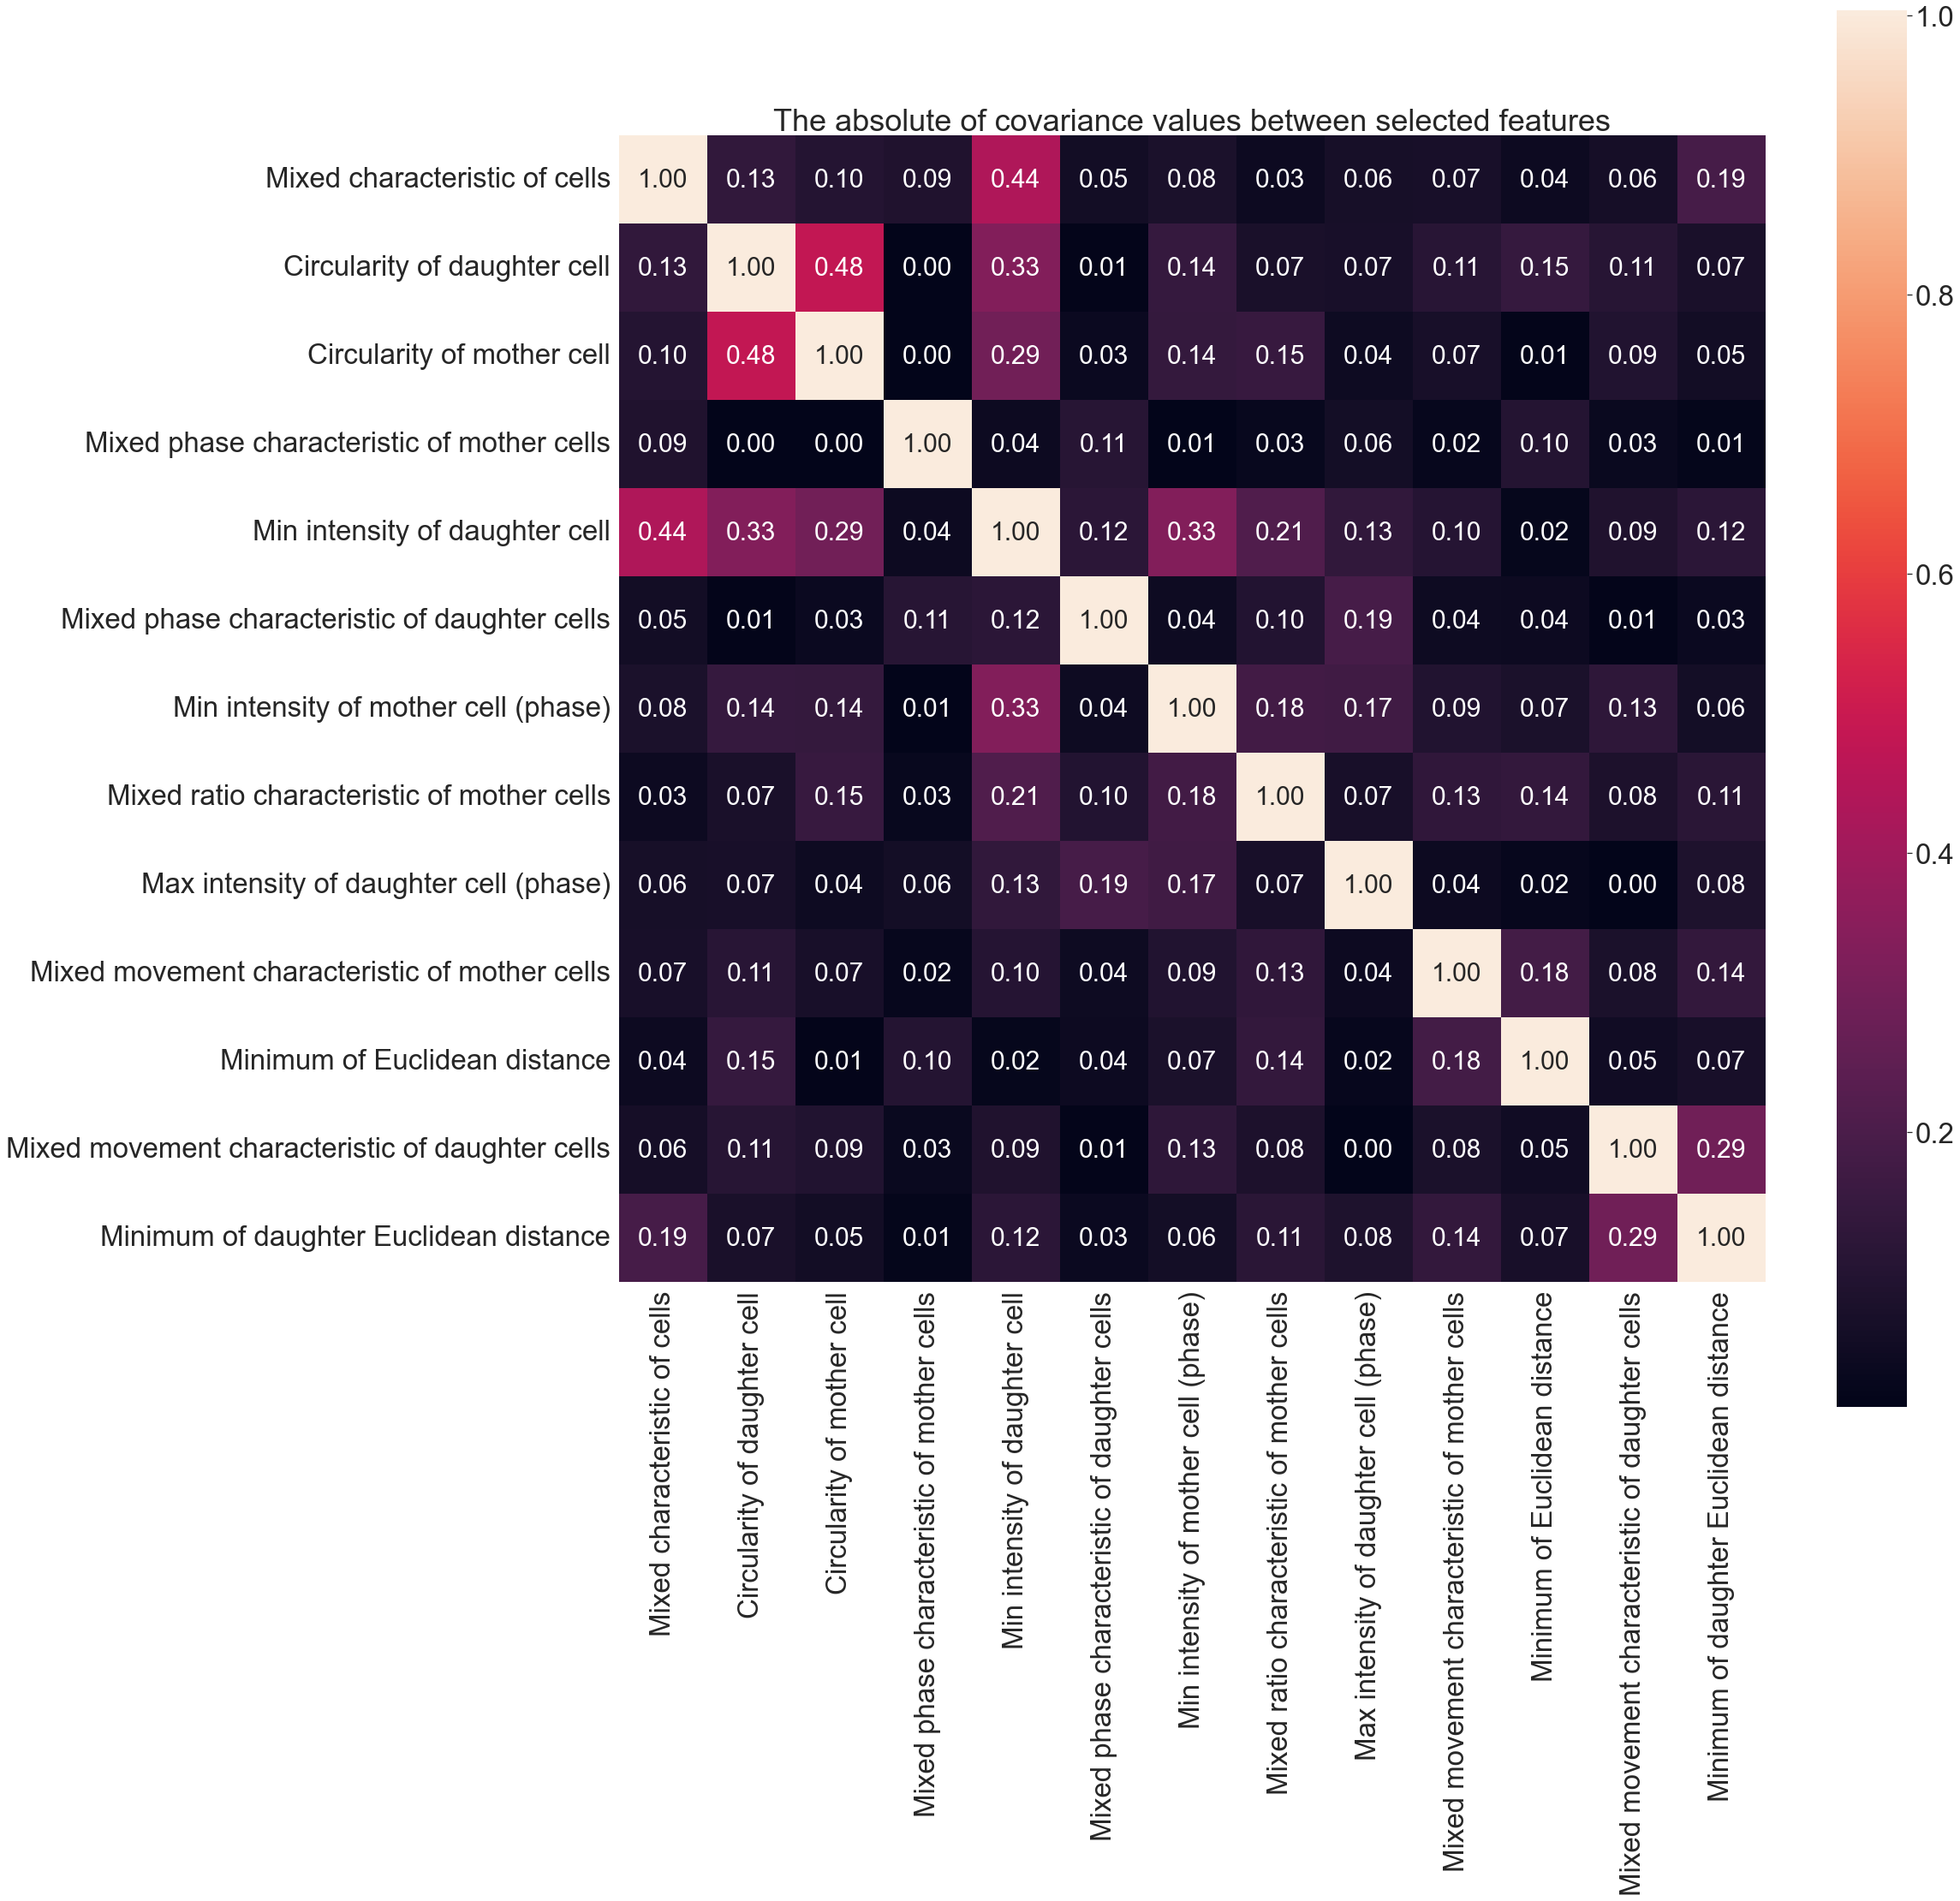

In [63]:
new_features_set_np = new_features_set.to_numpy()
new_features_set_cols = new_features_set.columns
new_features_set_std = stdsc.fit_transform(new_features_set_np)
new_features_set_cov_mat = np.cov(np.transpose(new_features_set_std))
plt.figure(figsize=(30,30))
sns.set(font_scale=3)
hm_selected_icg = sns.heatmap(abs(new_features_set_cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=new_features_set_cols,
                 xticklabels=new_features_set_cols)
plt.title('The absolute of covariance values between selected features')

In [64]:
input_new_feature_set = new_features_set.merge(py_label,left_index = True,right_index=True)
input_new_feature_set.to_csv('New input.csv')
input_new_feature_set.columns

Index(['Mixed characteristic of cells', 'Circularity of daughter cell',
       'Circularity of mother cell',
       'Mixed phase characteristic of mother cells',
       'Min intensity of daughter cell',
       'Mixed phase characteristic of daughter cells',
       'Min intensity of mother cell (phase)',
       'Mixed ratio characteristic of mother cells',
       'Max intensity of daughter cell (phase)',
       'Mixed movement characteristic of mother cells',
       'Minimum of Euclidean distance',
       'Mixed movement characteristic of daughter cells',
       'Minimum of daughter Euclidean distance', 'Label', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Circularity of mother cell', ylabel='Mixed characteristic of cells'>

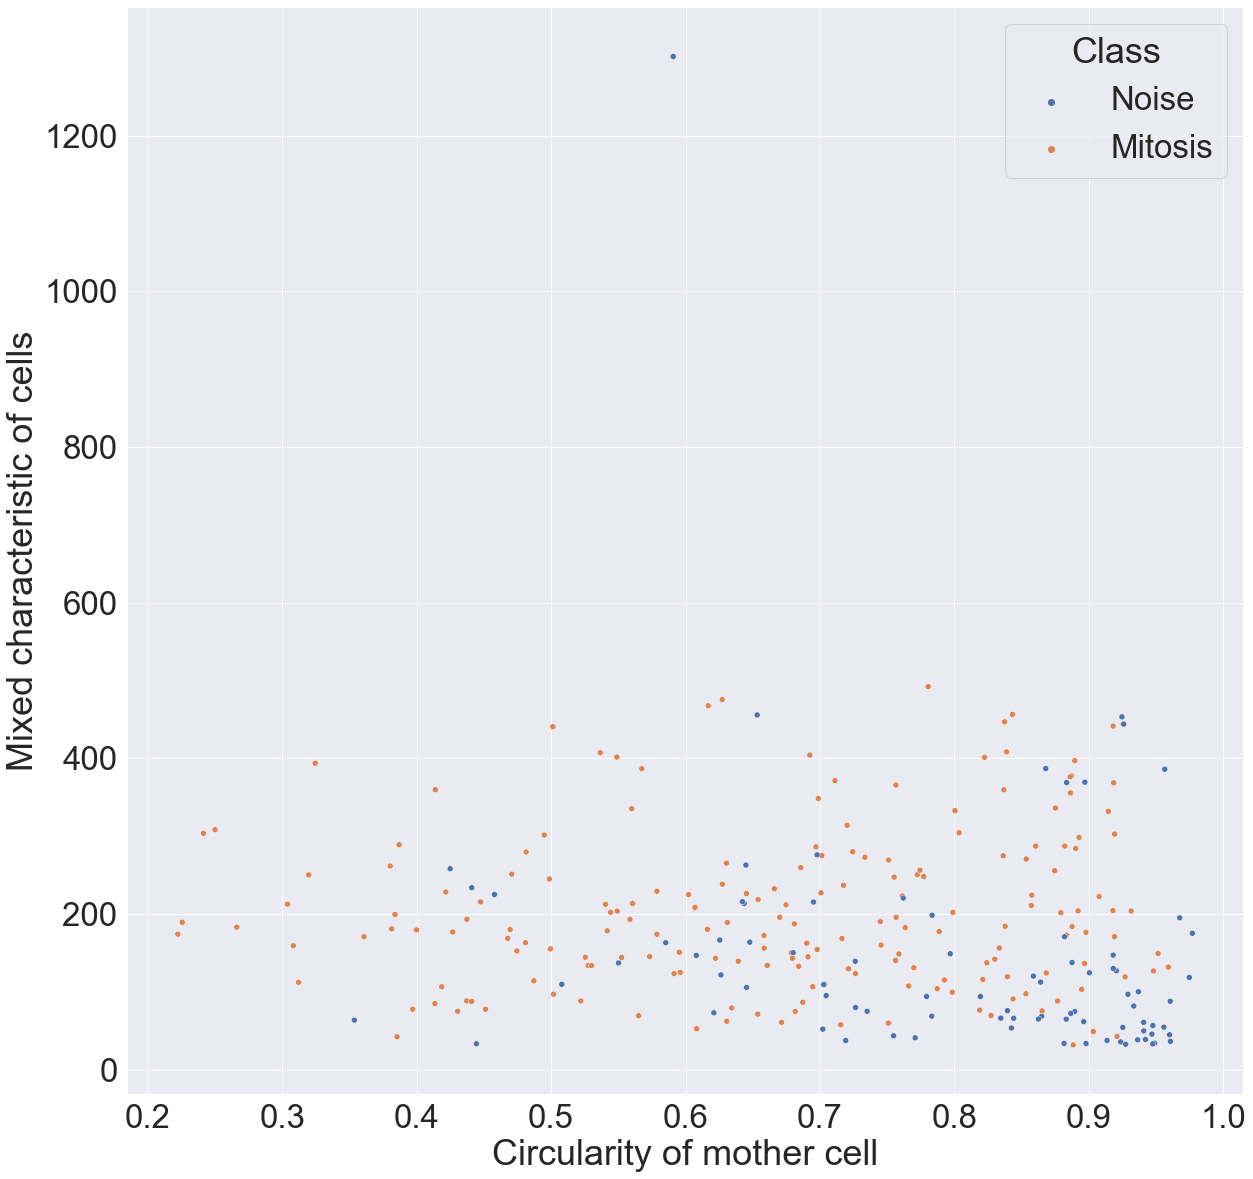

In [65]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = input_new_feature_set, x = 'Circularity of mother cell', 
                y = 'Mixed characteristic of cells', hue = 'Class')